In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from aquacrop import AquaCropModel, Soil, Crop, InitialWaterContent,IrrigationManagement
from aquacrop.utils import prepare_weather, get_filepath
import scipy.stats

import Aq_Optimization_functons
from Aq_Optimization_functons import *


/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
plt.rcParams["figure.dpi"] = 300

In [2]:

import math

def plot_box_with_percentile(df, percentile=55):
    """
    Creates a grid of box plots for each numeric variable in the DataFrame
    and annotates each plot with the specified percentile.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - percentile (int, optional): The percentile to annotate on each plot. Default is 55.
    """
    plt.rcParams["figure.dpi"] = 300
    numeric_columns = df.select_dtypes(include=['number']).columns[1:]
    num_columns = len(numeric_columns)
    
    # Determine grid size (4 rows, 3 columns as specified)
    rows = math.ceil(num_columns / 3)  # Calculate the number of rows needed
    cols = min(3, num_columns)        # Limit columns to 3
    
    # Set up the figure
    plt.figure(figsize=(15, 4 * rows))
    
    for i, column in enumerate(numeric_columns, 1):  # Enumerate starts at 1 for subplot indexing
        plt.subplot(rows, cols, i)
        
        # Boxplot
        sns.boxplot(y=df[column], color='skyblue')
        plt.title(f"{column}", fontsize=12)
        plt.ylabel('')
        plt.xlabel('')
        
        # Percentile Calculation
        percentile_value = df[column].quantile(percentile / 100)
        plt.axhline(percentile_value, color='red', linestyle='--', label=f"{percentile}th Percentile: {percentile_value:.2f}")
        plt.legend(fontsize=10)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


## without_NW

# All_fields_with ET

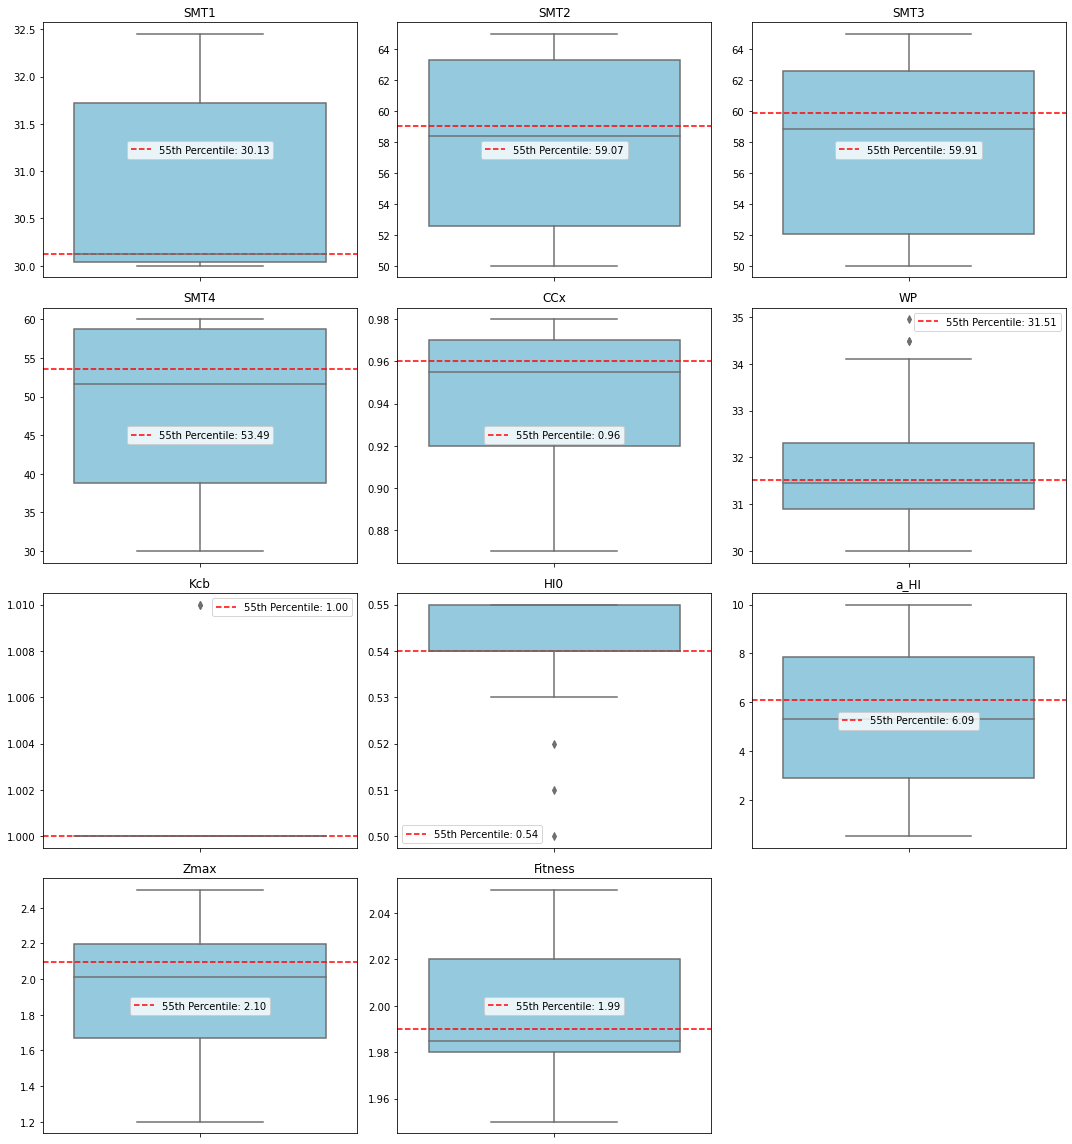

In [3]:
# df = pd.read_csv('Data/test_parameters_multiple_runs.csv')
df = pd.read_csv("Data/50particle_100_withET_newobj_fulldata.csv")
df = df.round(2)
# Assuming `df` is your DataFrame
plot_box_with_percentile(df)


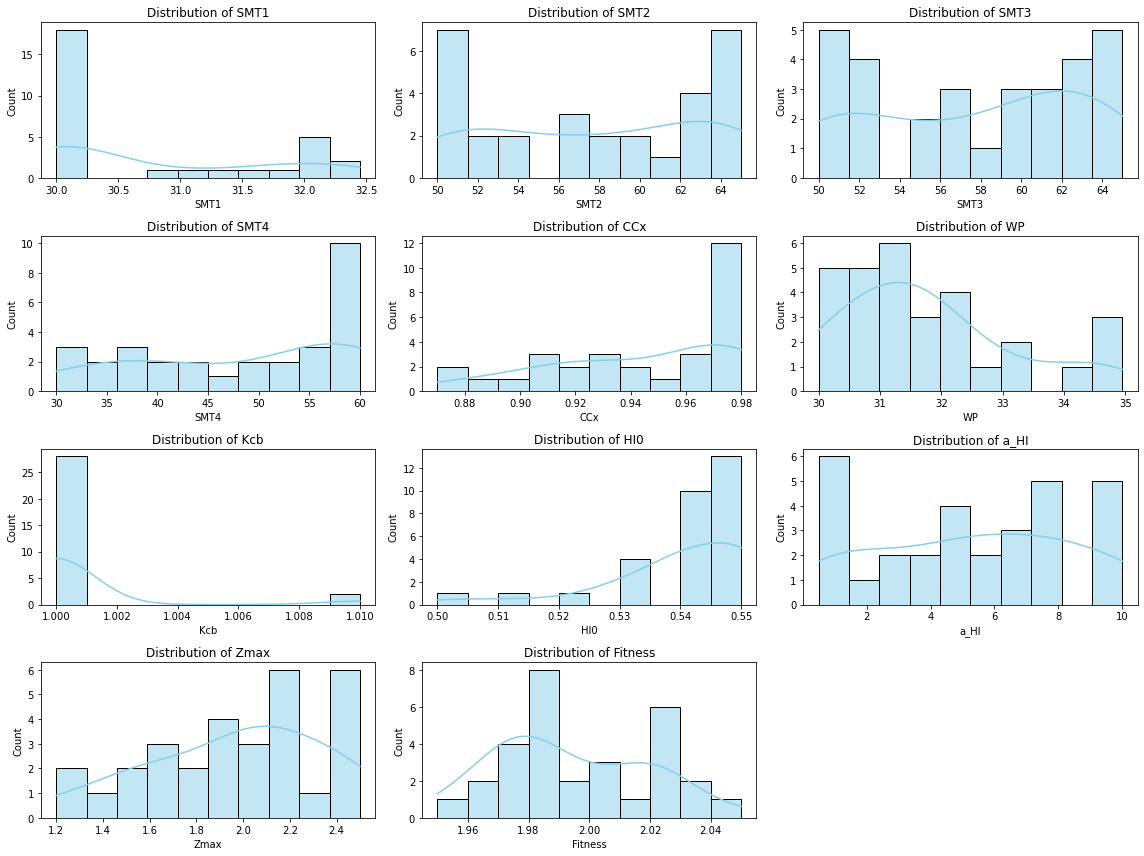

In [4]:

plt.figure(figsize=(16,12))

for i, col in enumerate(df.columns[1:], 1):

    plt.subplot(4, 3, i) 
    sns.histplot(df[col], kde=True, color="skyblue", bins =10)  # Replaces sns.distplot (deprecated) with sns.histplot
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# All_fields_Without ET

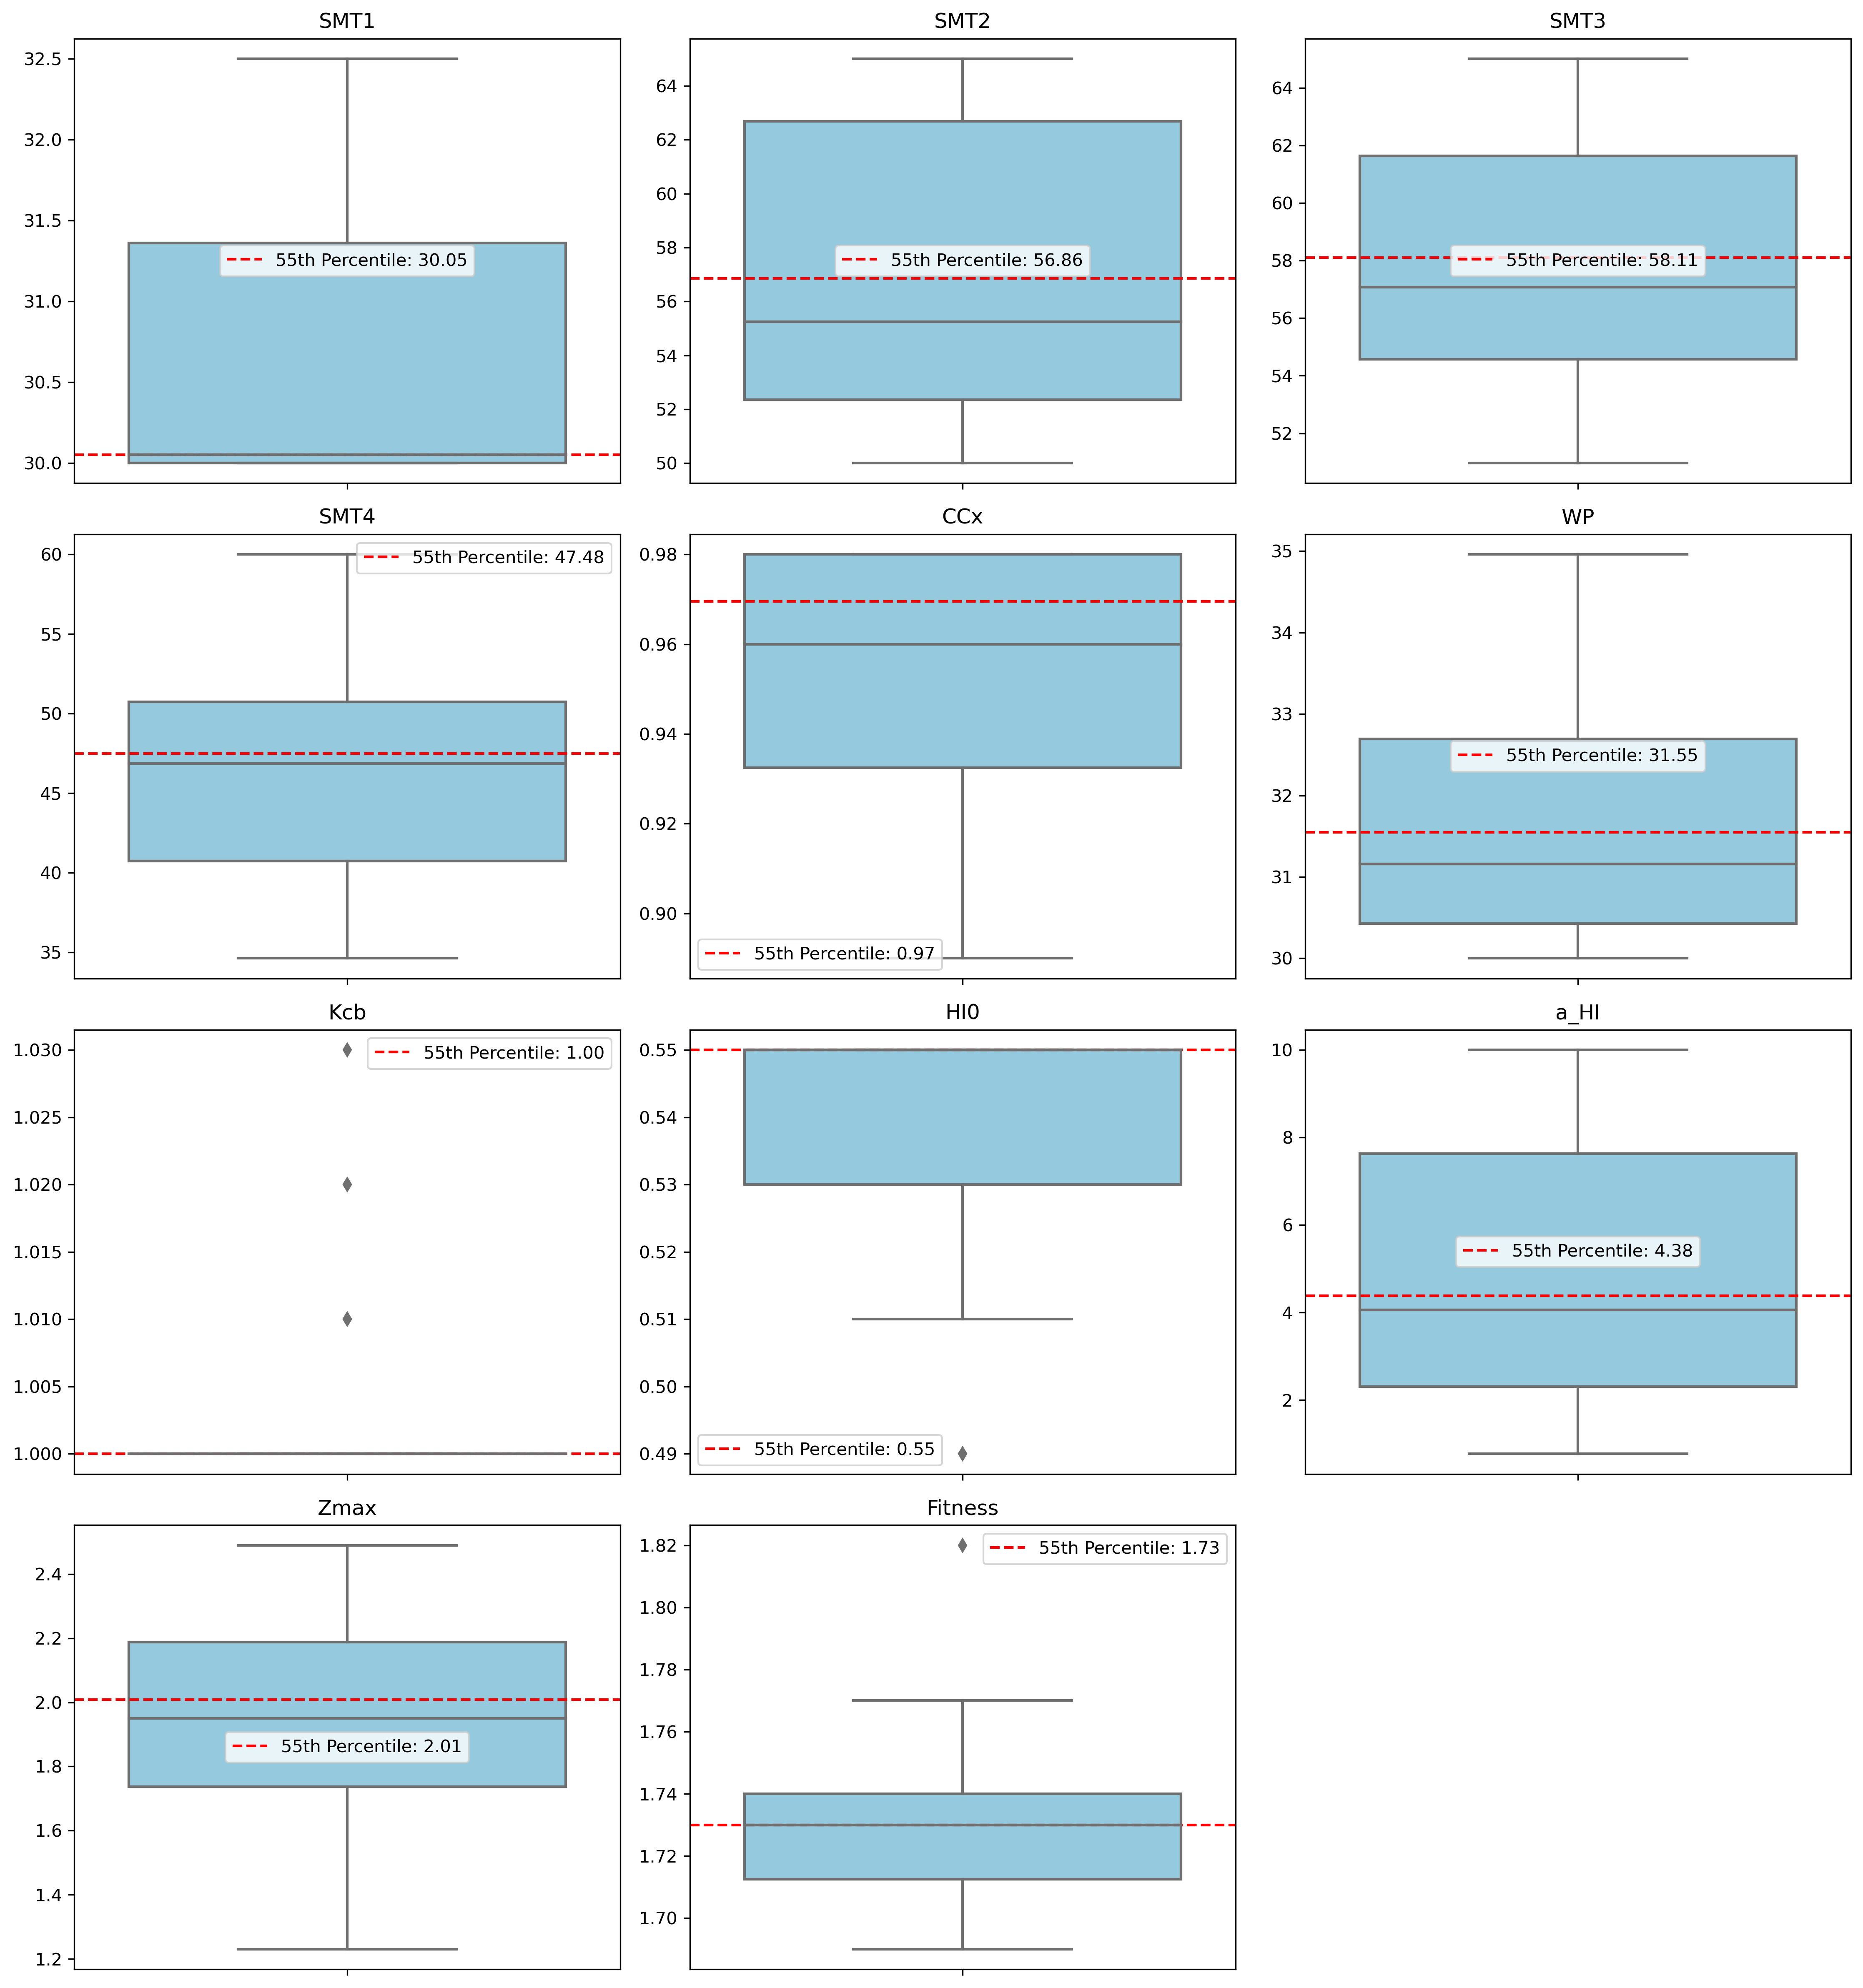

In [11]:
# df = pd.read_csv('Data/test_parameters_multiple_runs.csv')
df = pd.read_csv("Data/50particle_100__withoutET_newobj_fulldatanotrain.csv")
df = df.round(2)
# Assuming `df` is your DataFrame
plot_box_with_percentile(df)

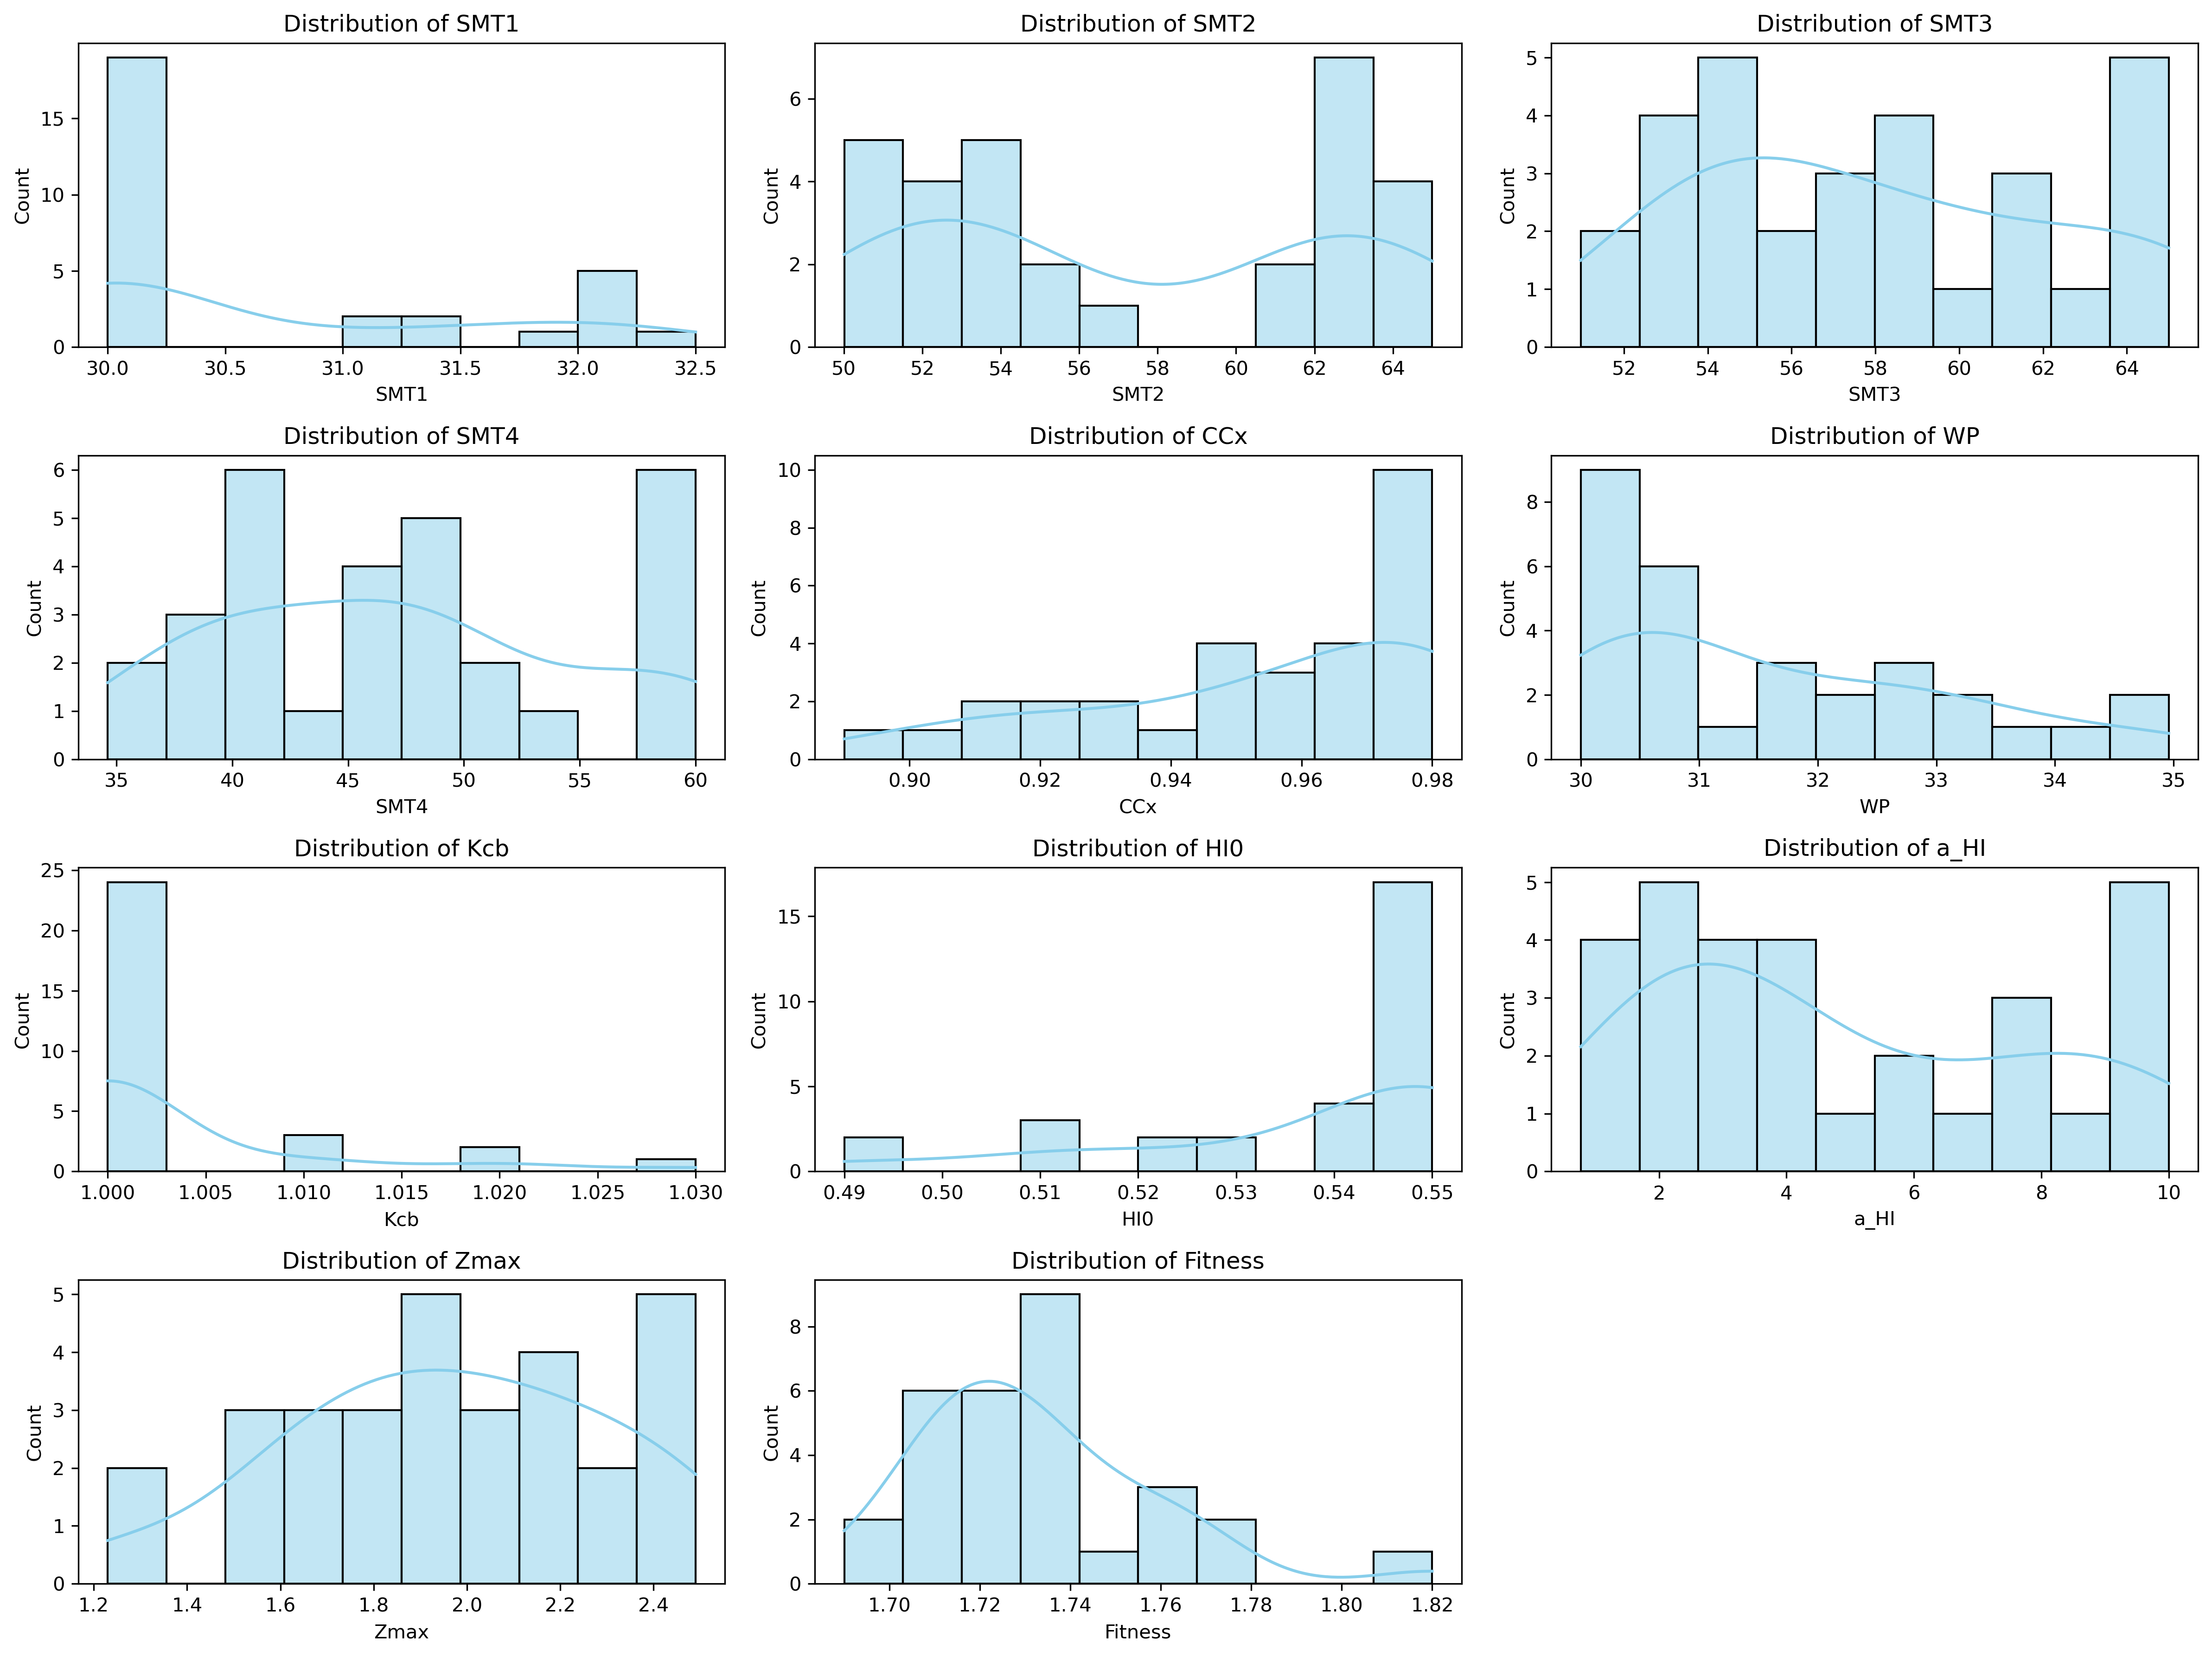

In [12]:

plt.figure(figsize=(16,12))

for i, col in enumerate(df.columns[1:], 1):

    plt.subplot(4, 3, i) 
    sns.histplot(df[col], kde=True, color="skyblue", bins =10)  # Replaces sns.distplot (deprecated) with sns.histplot
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## Without_ET_train

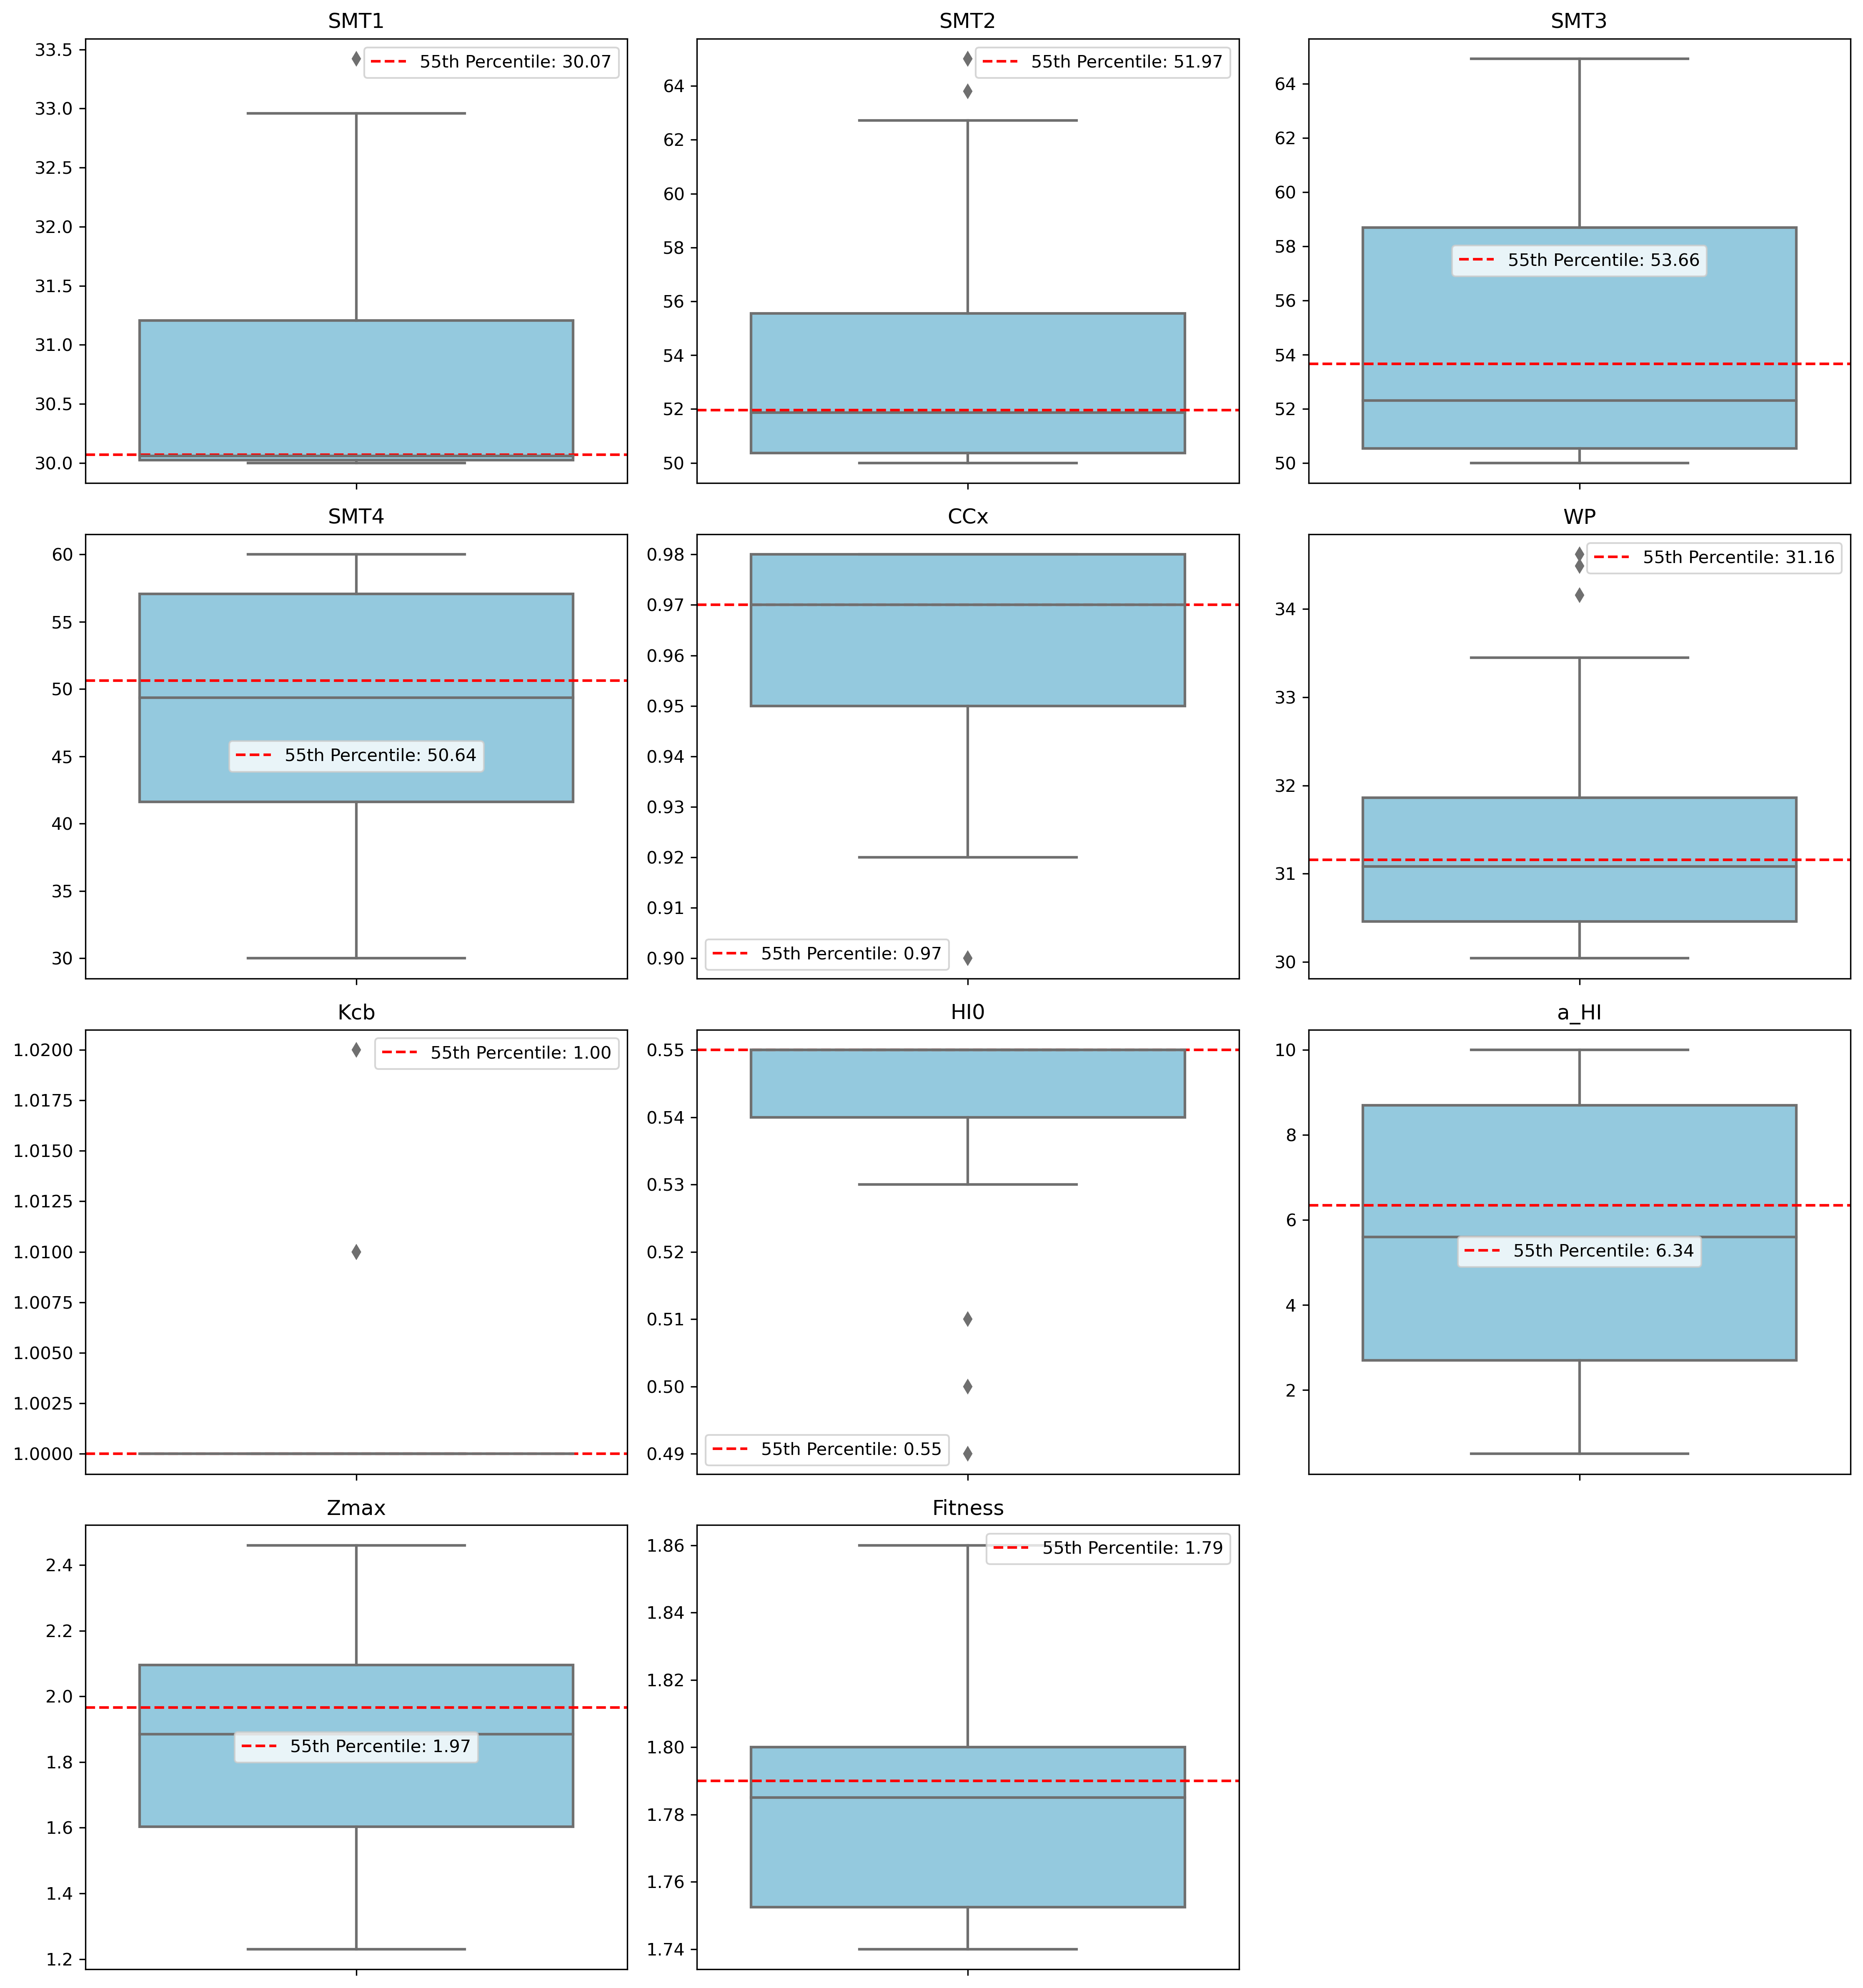

In [15]:
df = pd.read_csv('Data/50particle_100__withoutET_newobj_train.csv')
df = df.round(2)
plot_box_with_percentile(df)

# Irrigation and Yield

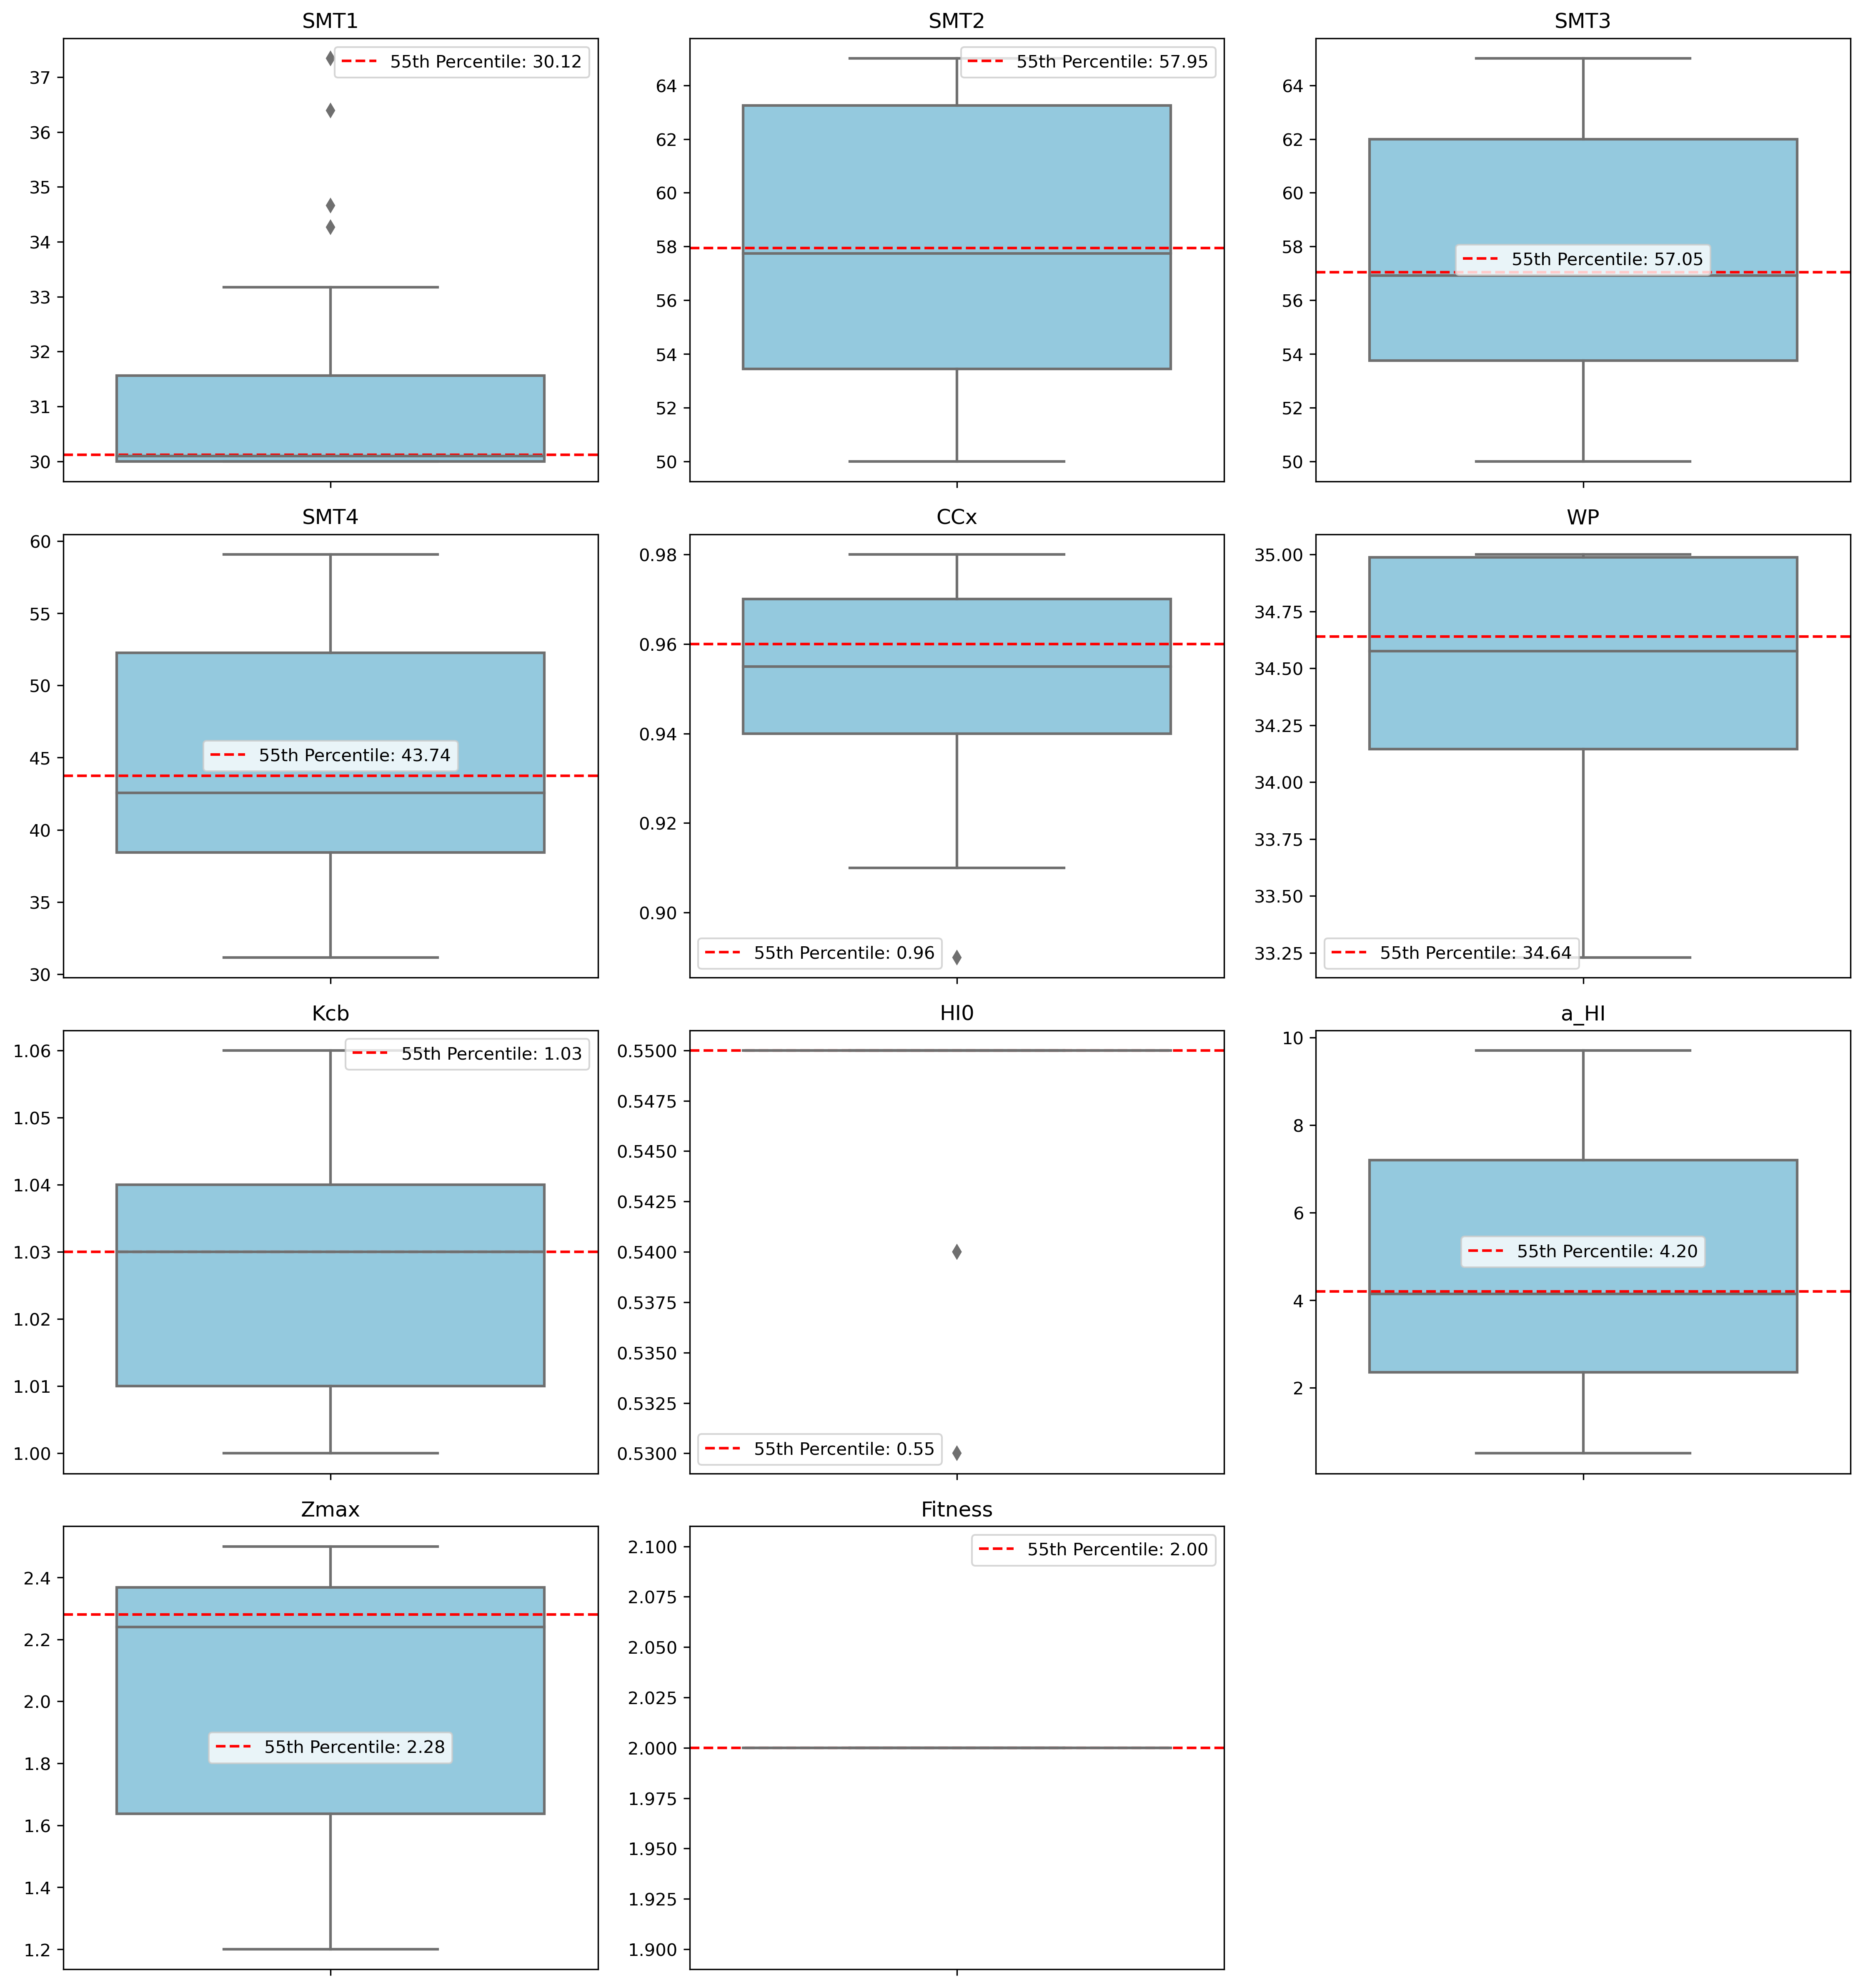

In [5]:
df = pd.read_csv('Data/irrig_yield_parameters_multiple_runs.csv')
df = df.round(2)
plot_box_with_percentile(df)

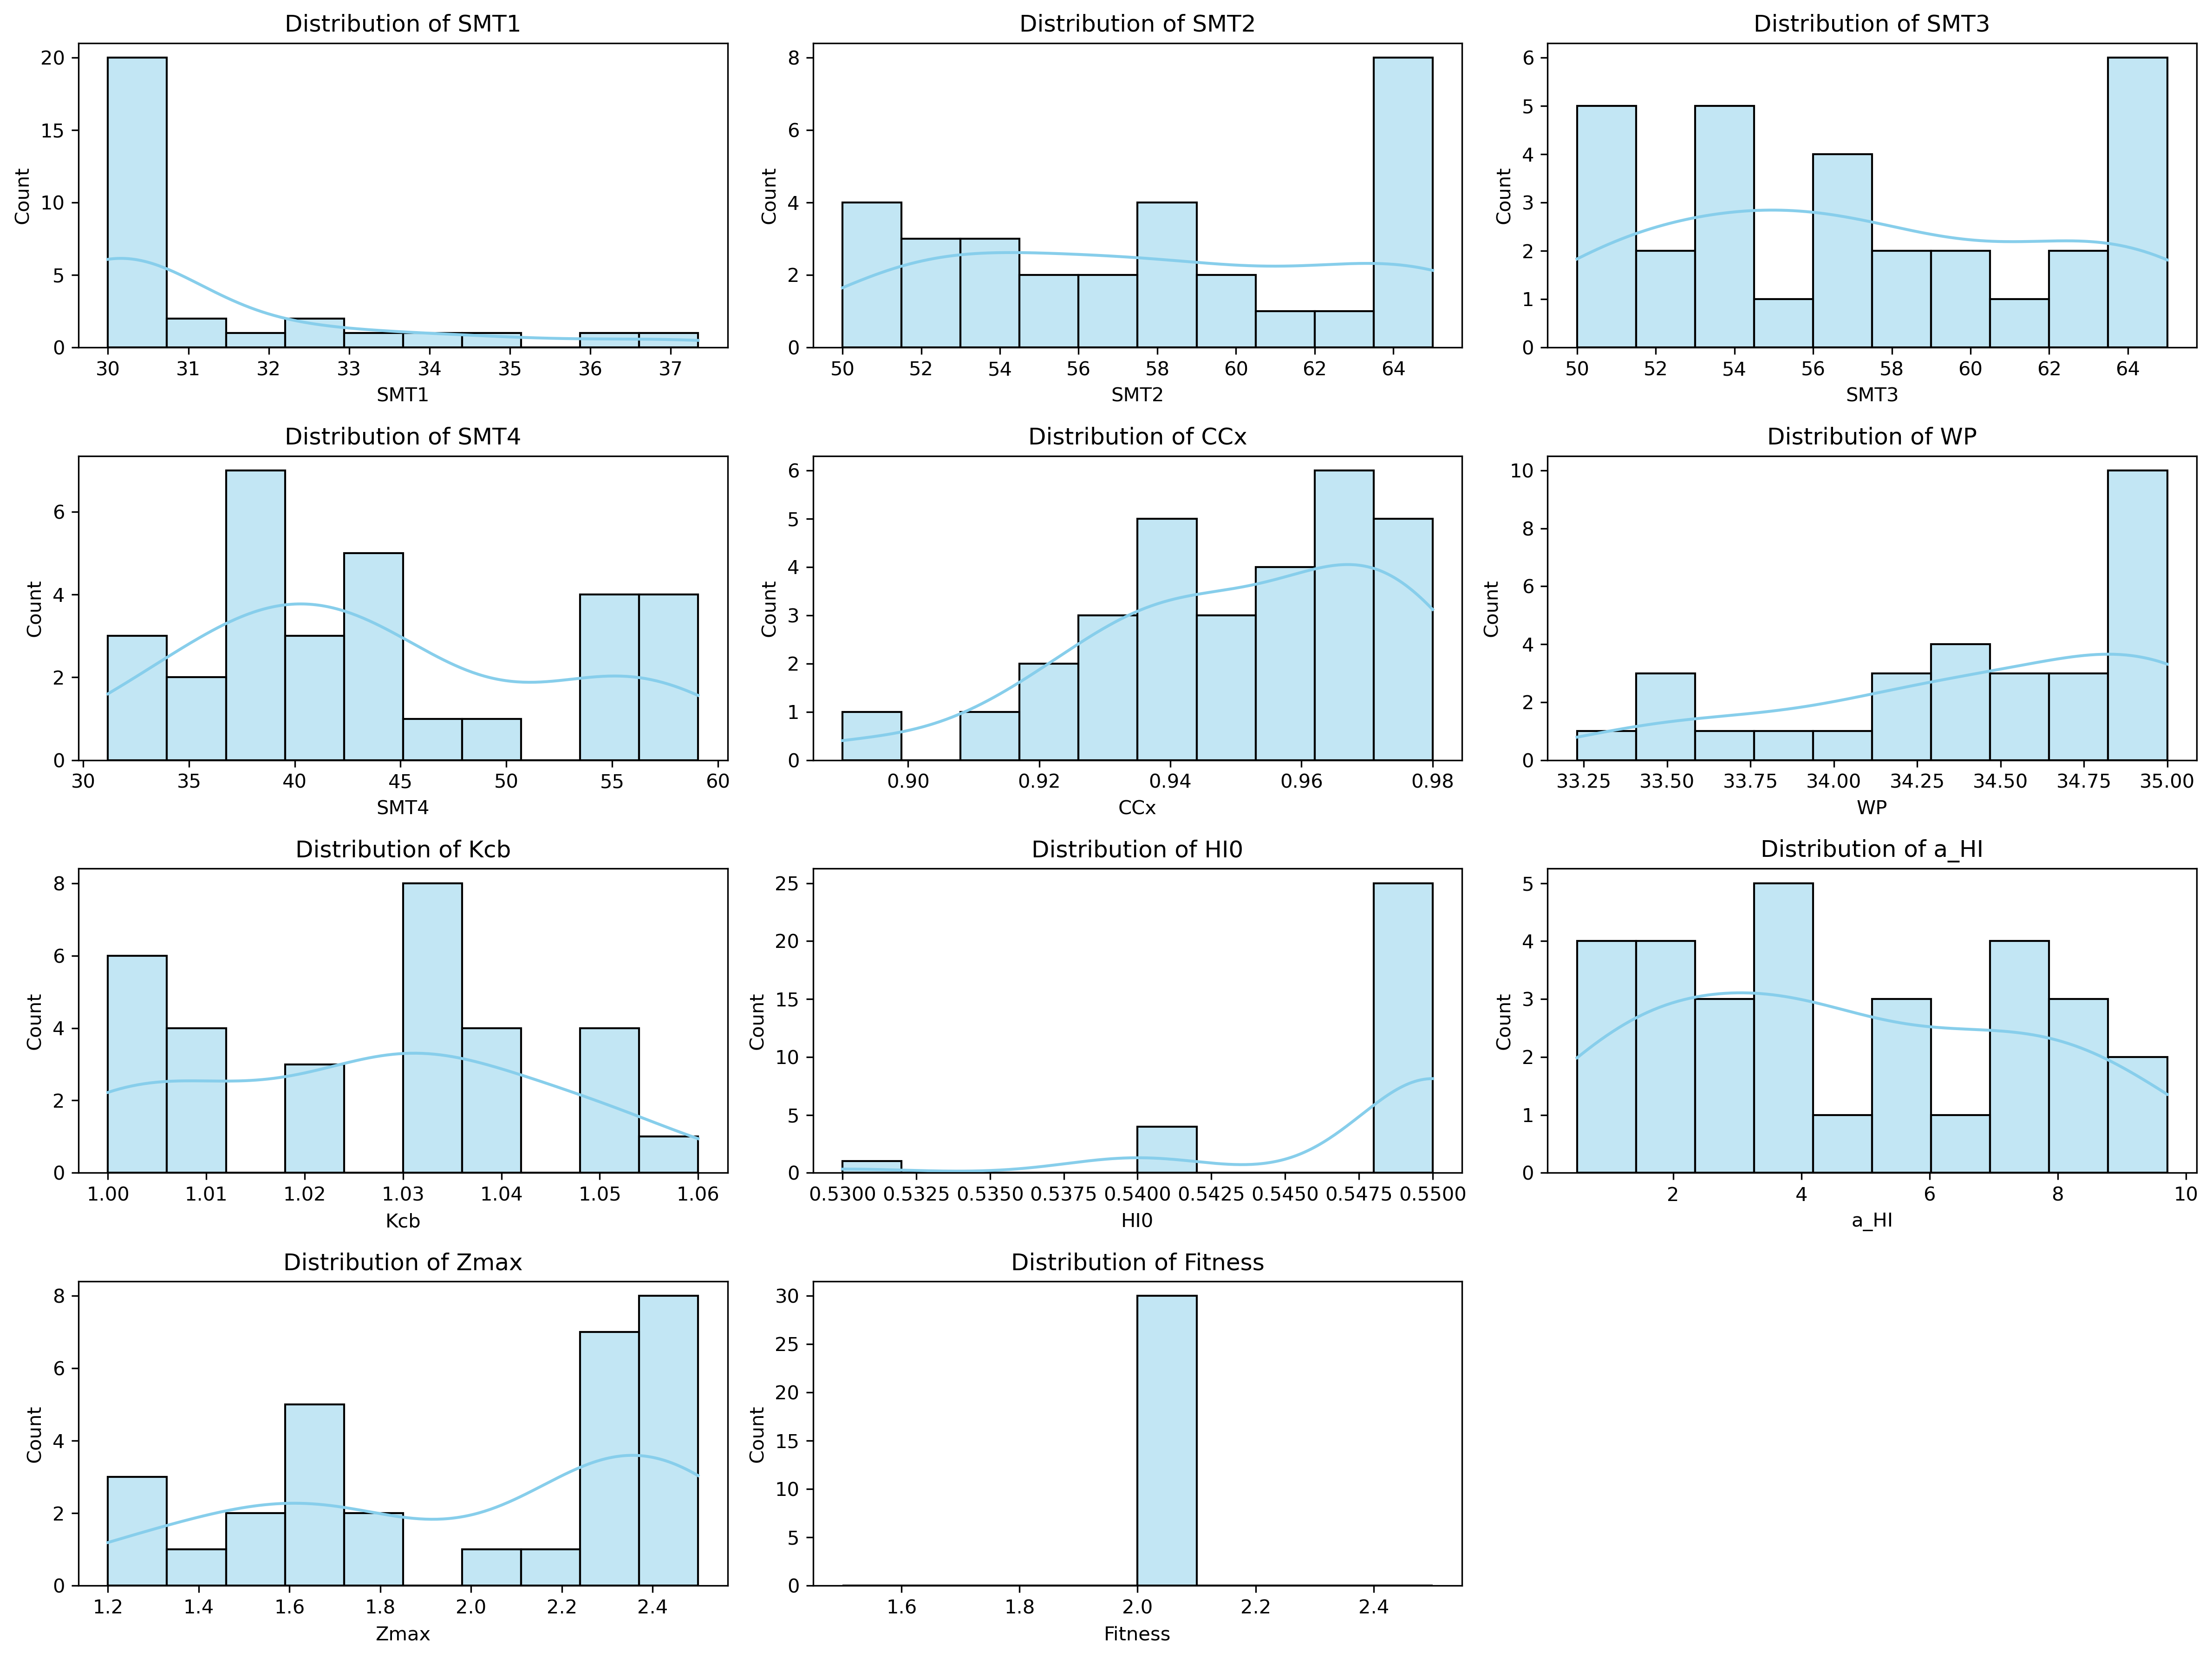

In [6]:

plt.figure(figsize=(16,12))

for i, col in enumerate(df.columns[1:], 1):

    plt.subplot(4, 3, i) 
    sns.histplot(df[col], kde=True, color="skyblue", bins =10)  # Replaces sns.distplot (deprecated) with sns.histplot
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# only_irrig_train

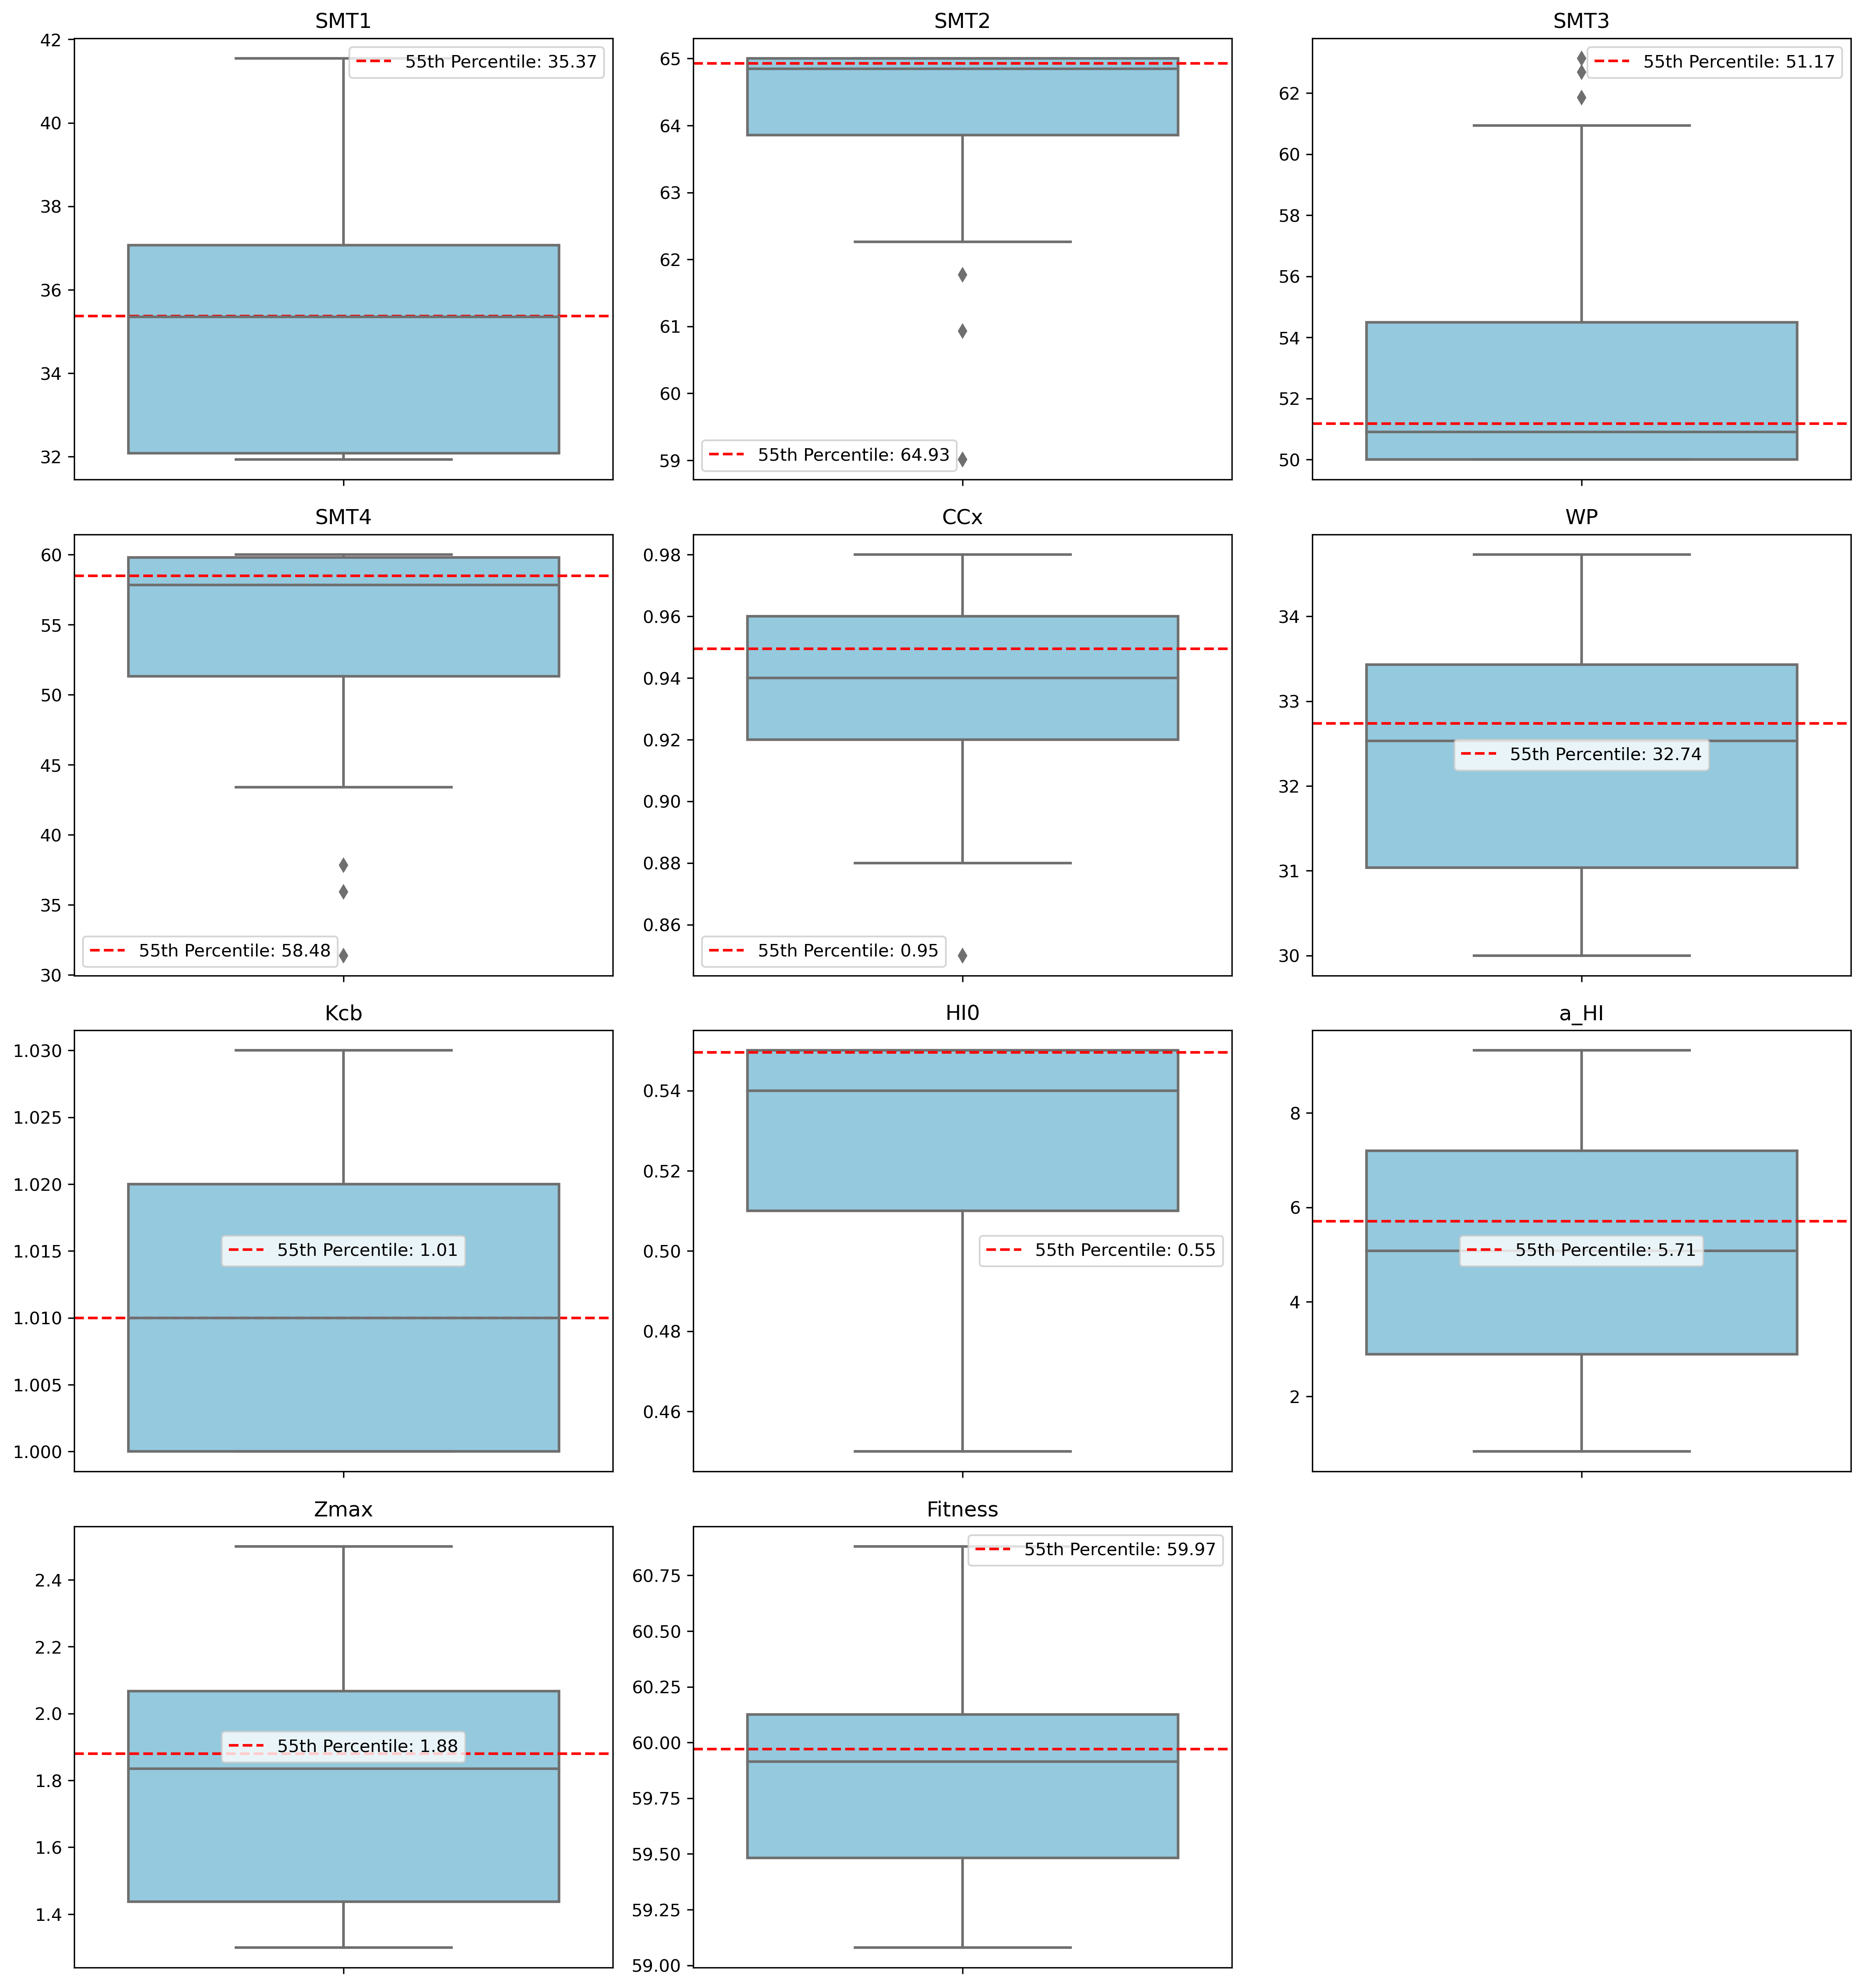

In [13]:
df = pd.read_csv('Data/50particle_100__withoutET_newobj_onlyirrig.csv')
df = df.round(2)
plot_box_with_percentile(df)

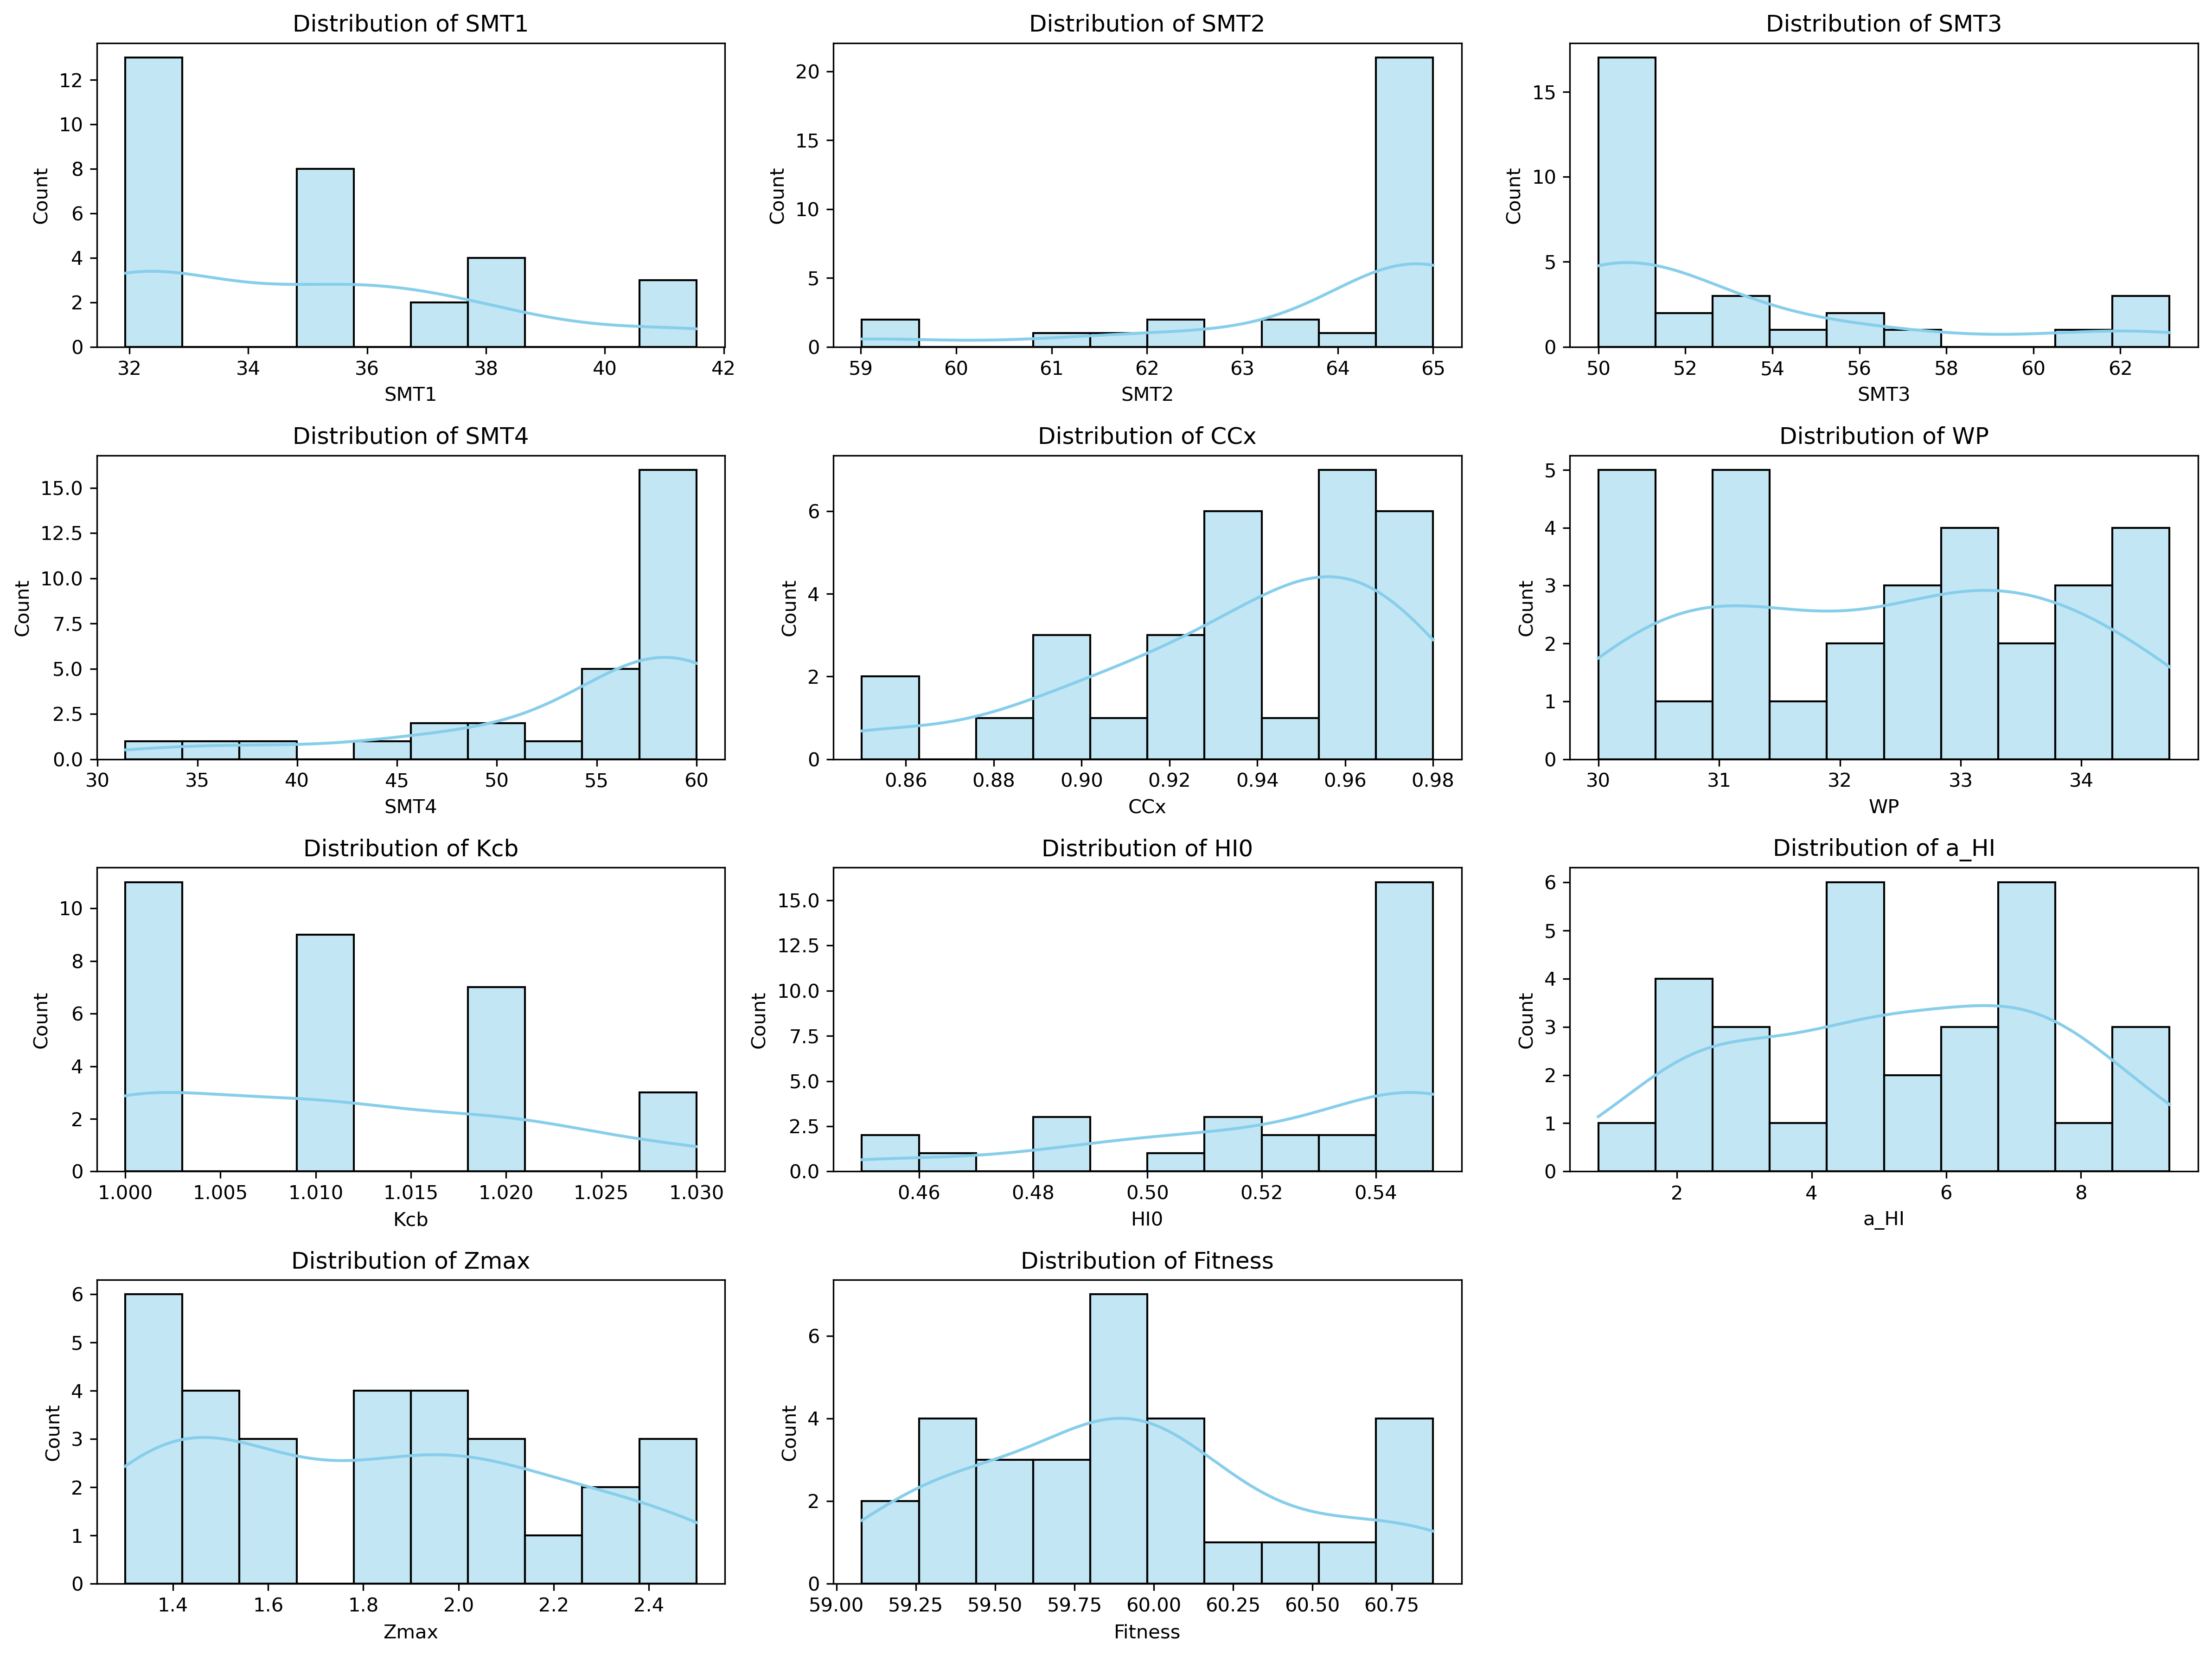

In [14]:

plt.figure(figsize=(16,12))

for i, col in enumerate(df.columns[1:], 1):

    plt.subplot(4, 3, i) 
    sns.histplot(df[col], kde=True, color="skyblue", bins =10)  # Replaces sns.distplot (deprecated) with sns.histplot
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# only_yield

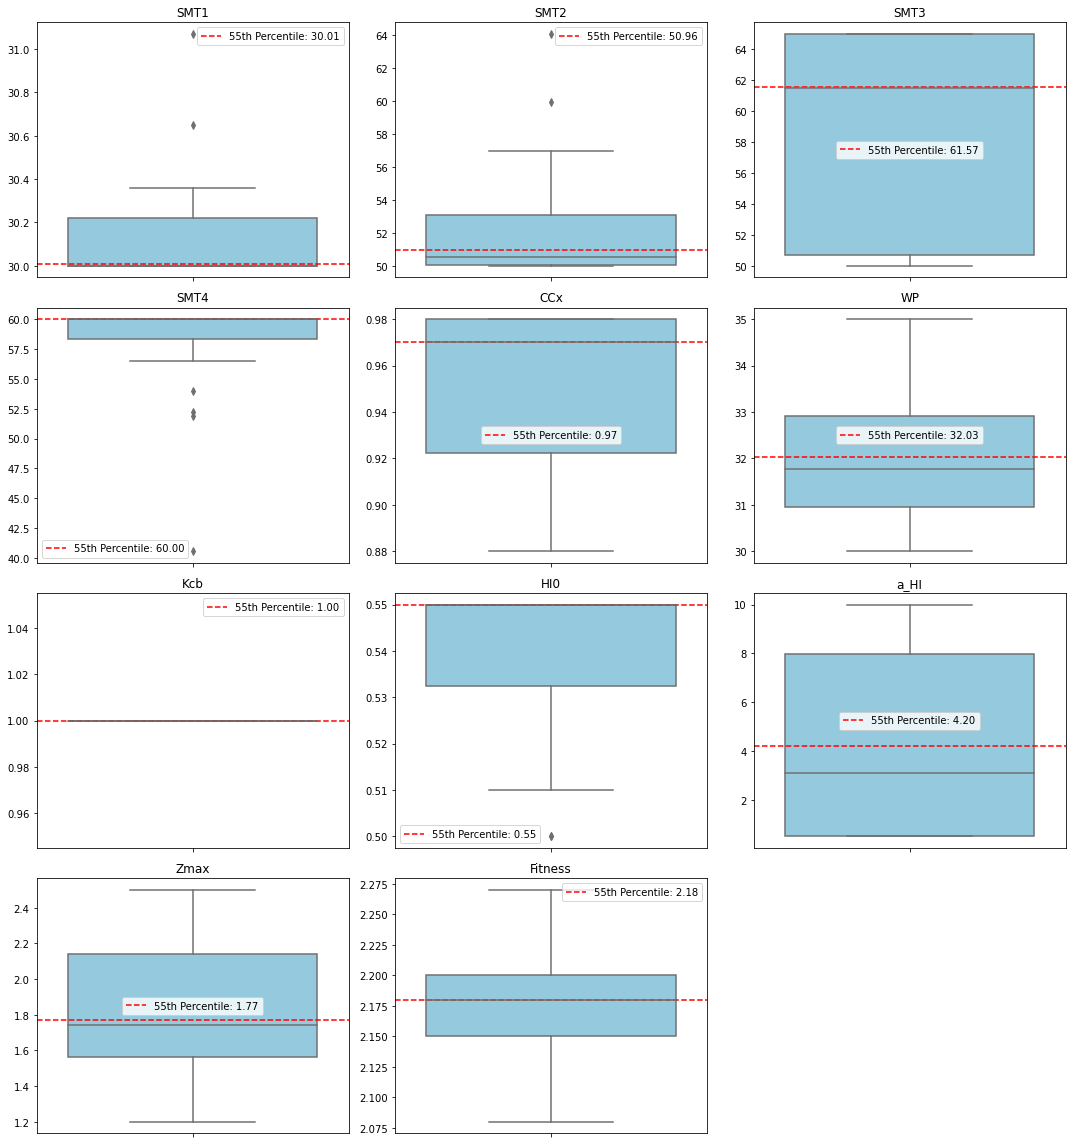

In [4]:
df = pd.read_csv('50particle_100__withoutET_newobj_onlyyield.csv').round(2)
plot_box_with_percentile(df)

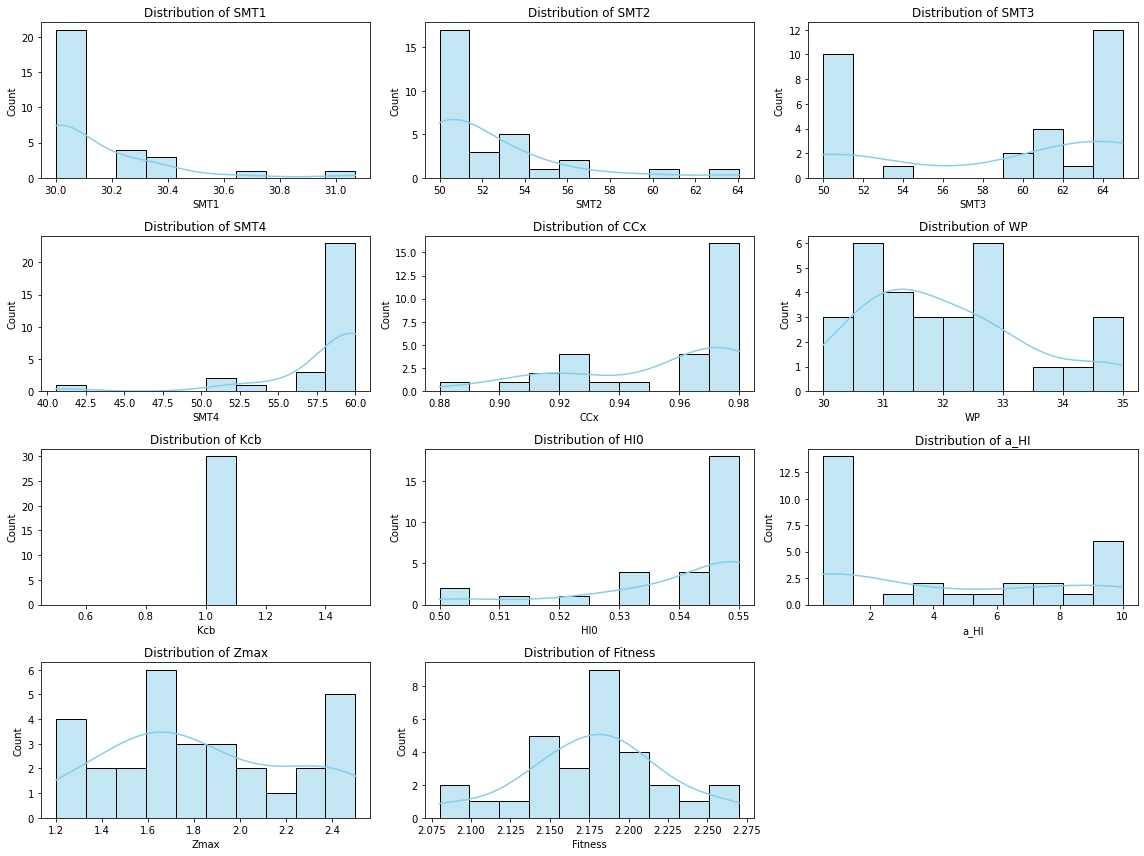

In [5]:

plt.figure(figsize=(16,12))

for i, col in enumerate(df.columns[1:], 1):

    plt.subplot(4, 3, i) 
    sns.histplot(df[col], kde=True, color="skyblue", bins =10)  # Replaces sns.distplot (deprecated) with sns.histplot
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
## Dry_years_yield

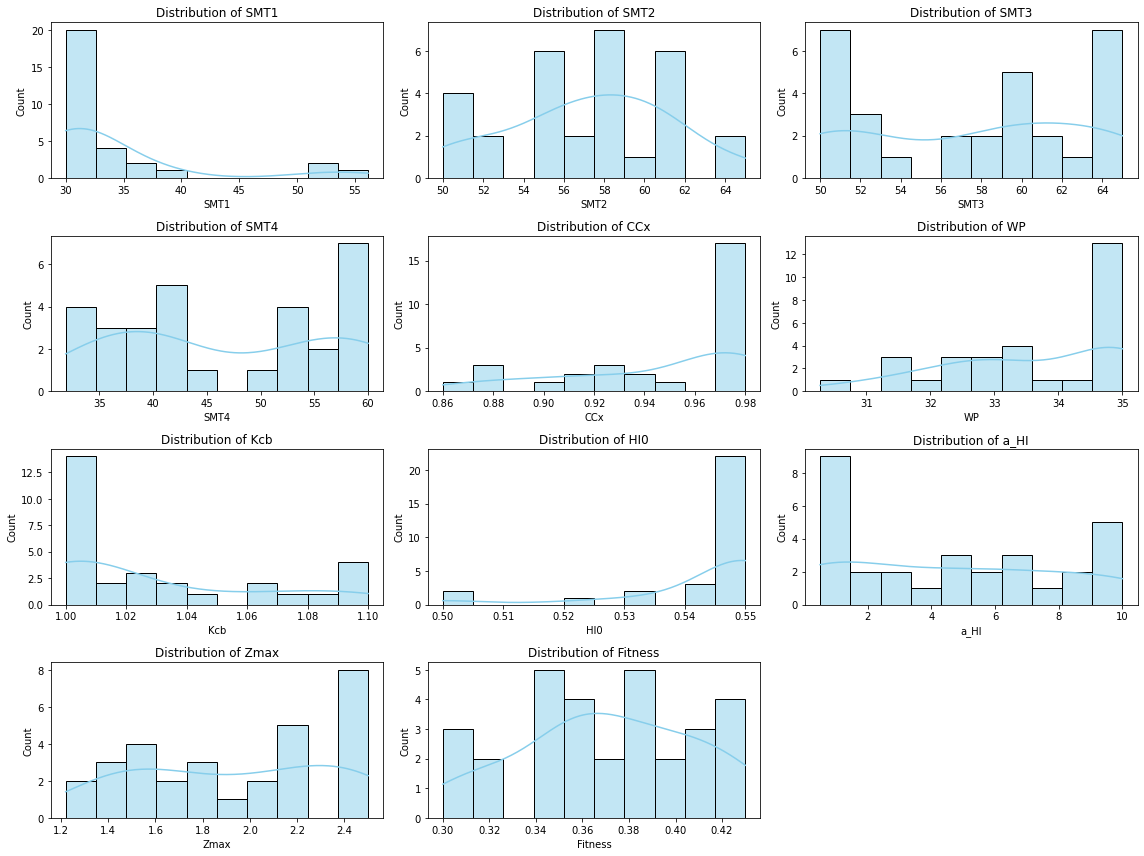

In [5]:
df = pd.read_csv('50particle_50_only_Yield_dry_years.csv').round(2)
plt.figure(figsize=(16,12))

for i, col in enumerate(df.columns[1:], 1):

    plt.subplot(4, 3, i) 
    sns.histplot(df[col], kde=True, color="skyblue", bins =10)  # Replaces sns.distplot (deprecated) with sns.histplot
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

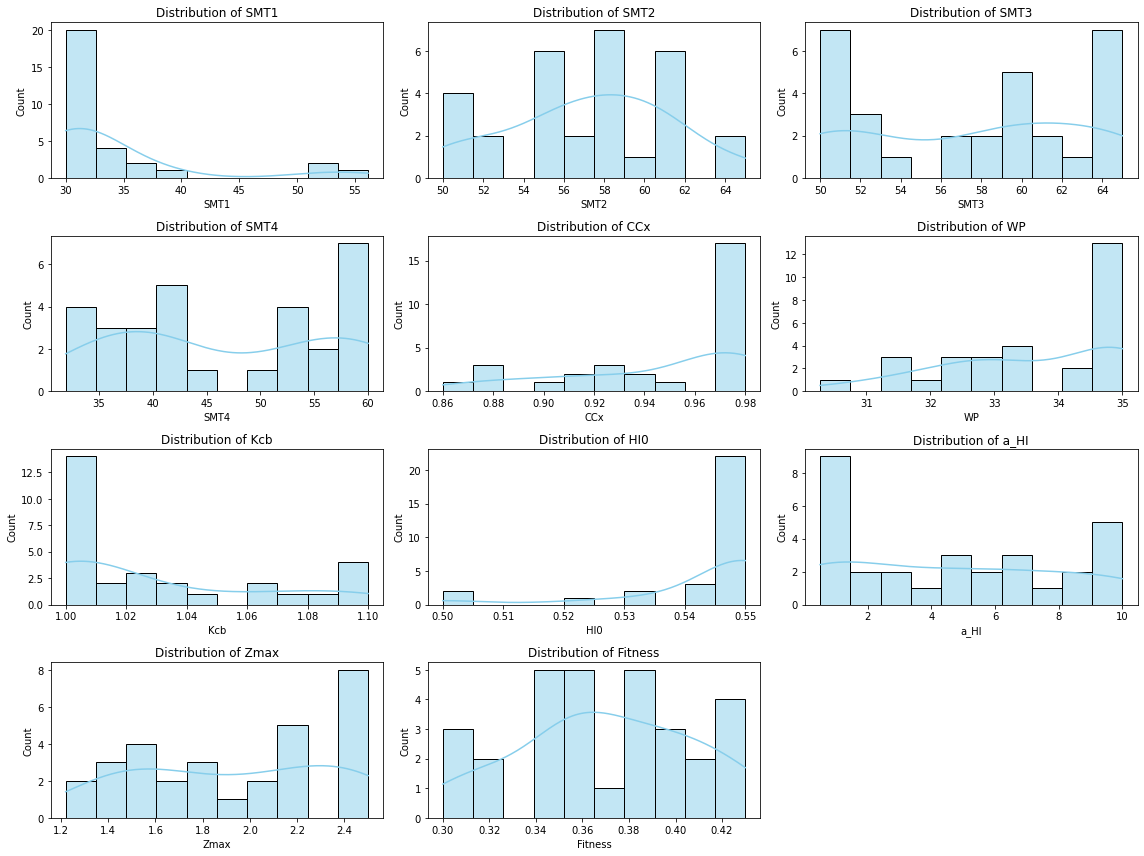

In [6]:
df = pd.read_csv('50particle_100_only_Yield_dry_years.csv').round(2)
plt.figure(figsize=(16,12))

for i, col in enumerate(df.columns[1:], 1):

    plt.subplot(4, 3, i) 
    sns.histplot(df[col], kde=True, color="skyblue", bins =10)  # Replaces sns.distplot (deprecated) with sns.histplot
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [14]:
df = pd.read_csv("Data/NSGA_II_onlyNW.csv").sort_values(by = "R2 (Yield)", ascending =False)
df


,R2 (Yield),R2 (Irrigation),smt_1,smt_2,smt_3,smt_4,CCx,WP,Kcb,HI0,a_HI,Zmax
62,0.239559,-1.541462,30.871411,50.452160,51.585924,59.875246,0.979536,33.015539,1.015423,0.485510,8.450661,1.895035
29,0.236047,-1.536888,30.874202,50.126944,51.585924,59.833922,0.979668,33.428945,1.015424,0.478435,7.083001,1.895035
45,0.235728,-1.534682,30.874202,50.127089,51.585924,59.833922,0.979668,33.428945,1.015413,0.478435,7.083001,1.895035
18,0.235515,-1.526337,30.876404,50.129557,51.585924,59.830112,0.979678,33.428945,1.015373,0.476467,8.378590,1.895035
25,0.234465,-1.521187,30.873900,50.128746,51.585924,59.879014,0.979668,33.496657,1.015423,0.477072,6.983417,1.895035
...,...,...,...,...,...,...,...,...,...,...,...,...
46,-0.125408,-0.518768,34.301118,64.201952,64.801627,46.222810,0.979718,31.037333,1.015433,0.510754,2.018479,1.213367
13,-0.166468,-0.515432,34.455625,63.773704,64.894922,46.264076,0.979972,30.965682,1.016350,0.515565,1.472905,1.213694
40,-0.221843,-0.470009,34.300484,64.202177,64.808806,46.255226,0.979668,30.965275,1.015432,0.504402,1.528797,1.213248
33,-0.221843,-0.470009,34.300484,64.202177,64.808806,46.255226,0.979668,30.965275,1.015432,0.504402,1.528797,1.213248


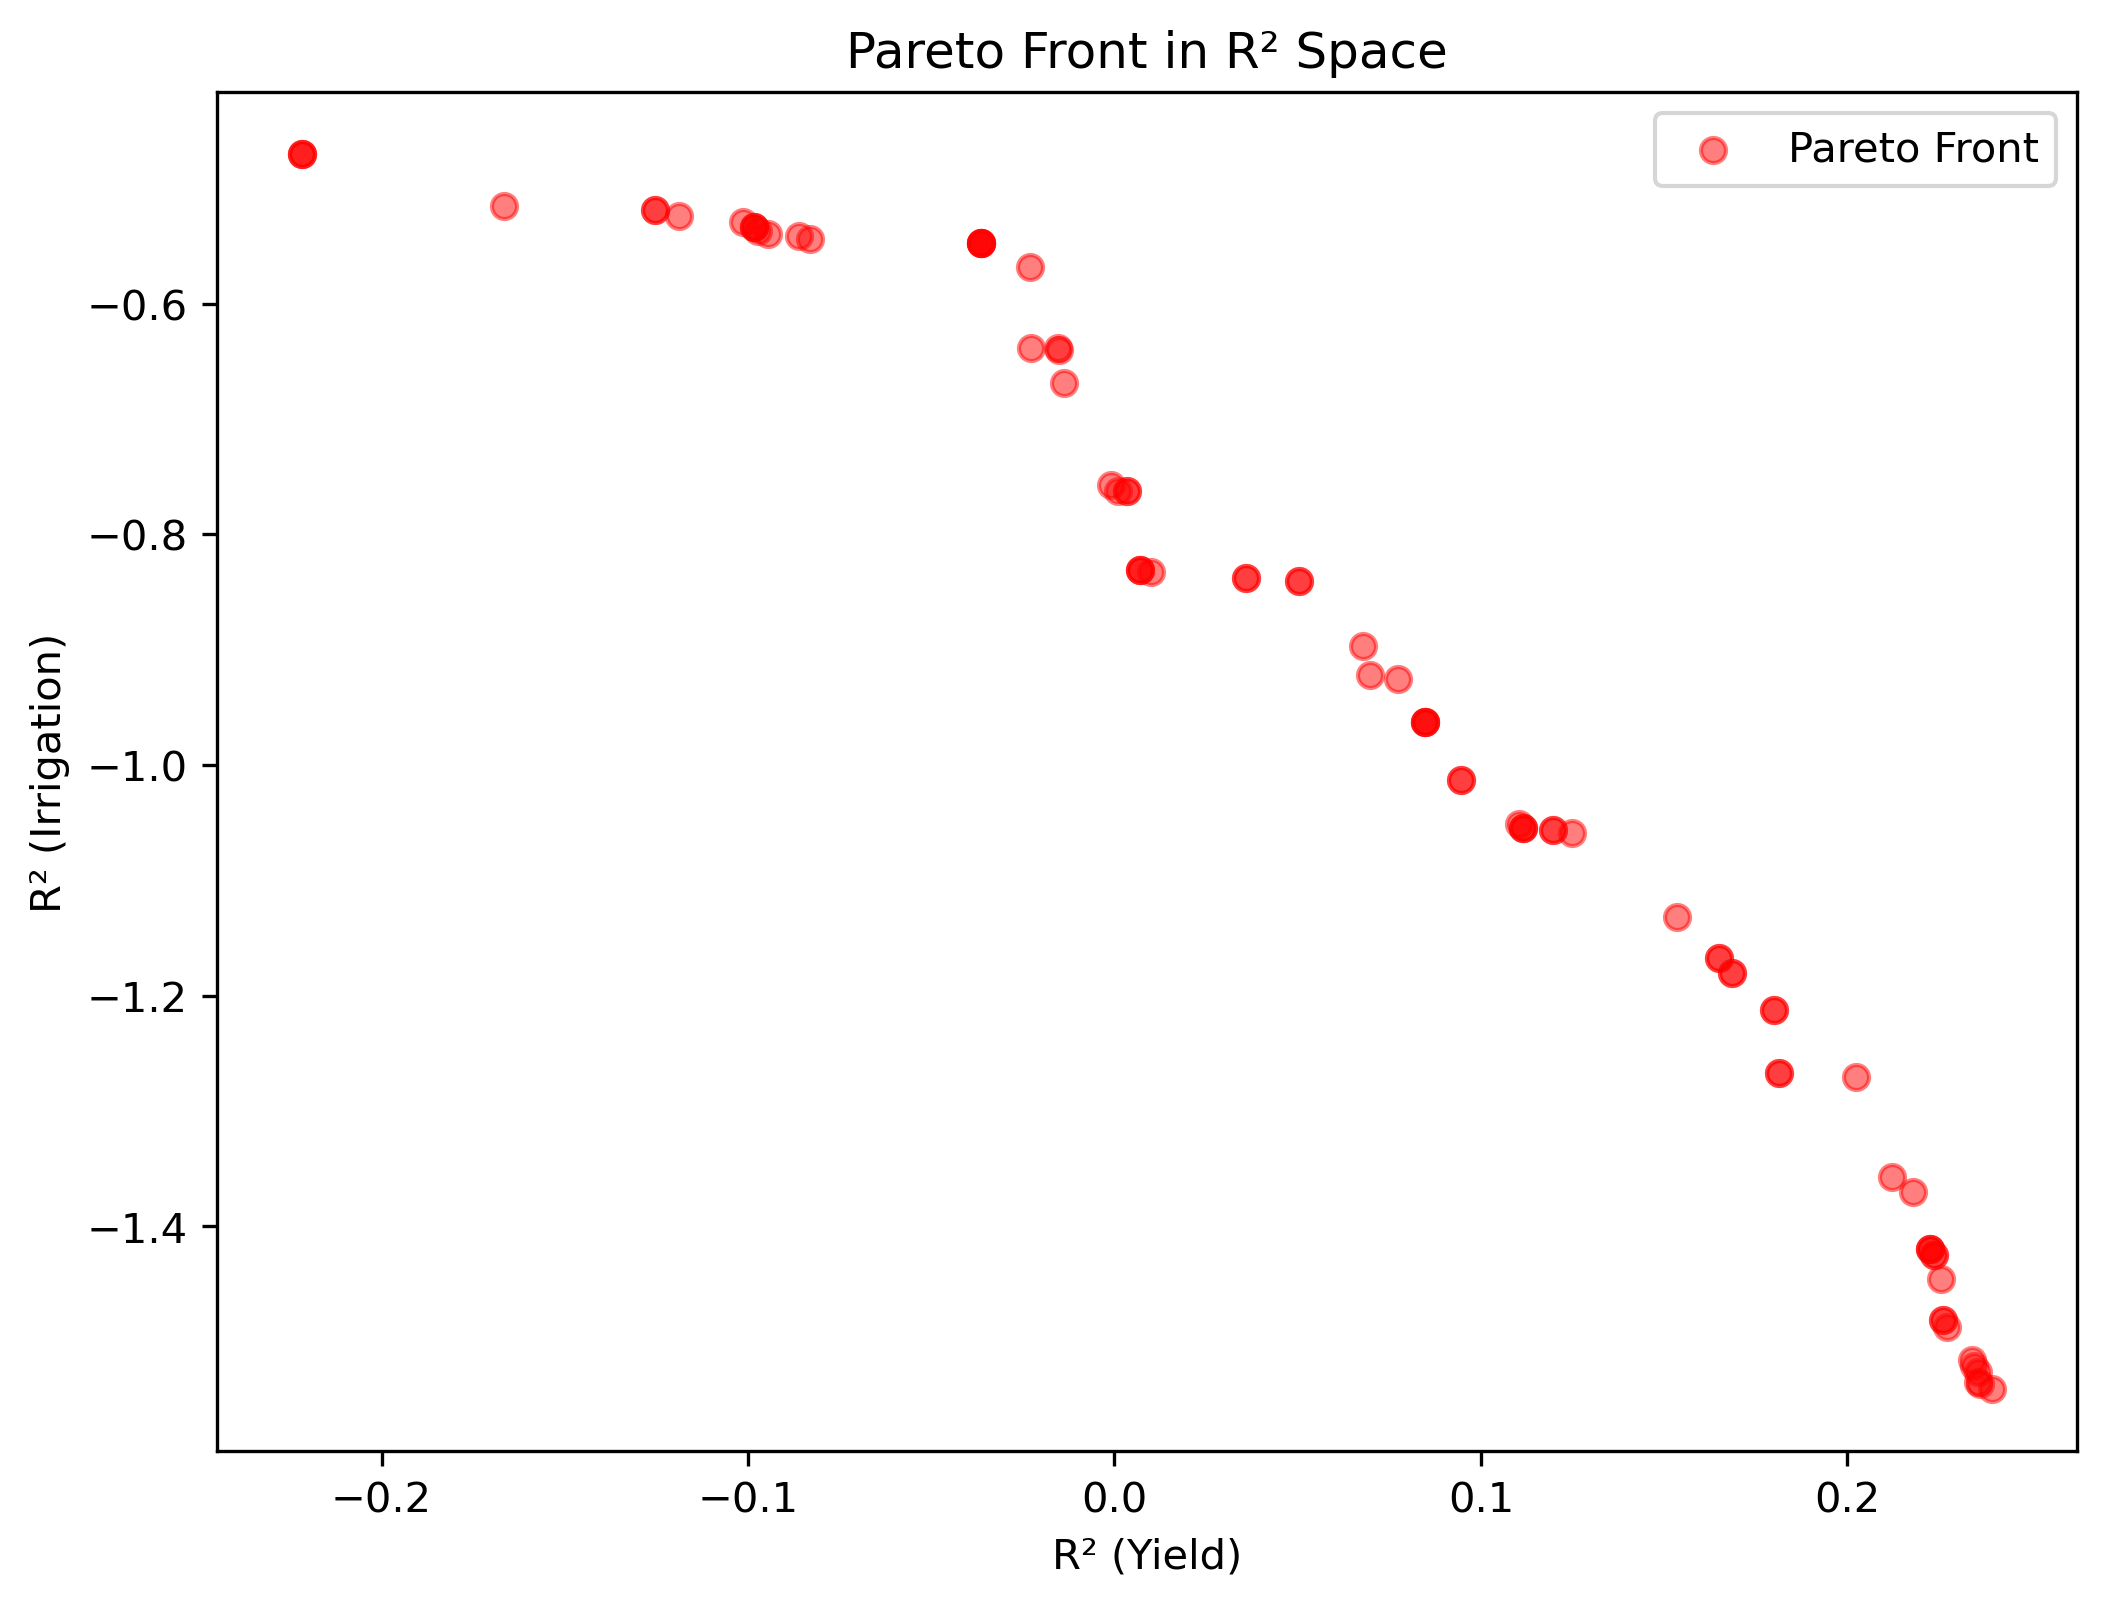

In [8]:
# Scatter plot of all solutions
plt.figure(figsize=(8, 6))
plt.scatter(df["R2 (Yield)"], df["R2 (Irrigation)"], color='r', alpha=0.5, label="Pareto Front")

plt.xlabel('R² (Yield)')
plt.ylabel('R² (Irrigation)')
plt.legend()
plt.title("Pareto Front in R² Space")
plt.show()